# Customer Churn Prediction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

* Dataframe consisit of 7043 datapoints and 21 columns or eatures.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* There are only 03 features having numeric datapoints.

   1] Senior citizen , tenure and MonthlyCharges.
    
   2] TotalCharges have float type data values but its having object data types which requires further analysis.

   3] customerID is index like variable which can be eleiminated.
    
   4] other features are related to service type and plans of customers .

 * Descriptive stats

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


1] Senior citizen is categorical in nature.upto 75% of records are 0 while rest are 1.The customers having 0 in SeniorCitzen feature are not old people while  1 vaue represent senior citizen .

2] tenure is number of months in which 0 months is minimum number of months for customer while 72 month is maximum value.with Standard Deviation of 24 which suggest that there are no otliers in tenure.

3] MOnthlyCharges is charges of customer on basis of month or price of plan for a month which are ranges from 18 to 118.75 
  with standard deviation of 30.09 .Also suggest that there are no outliers in MonthlyCharges

* Analysis of missing records.

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.isna().sum().sum()

0

* The visualization of missing records wit Heatmap

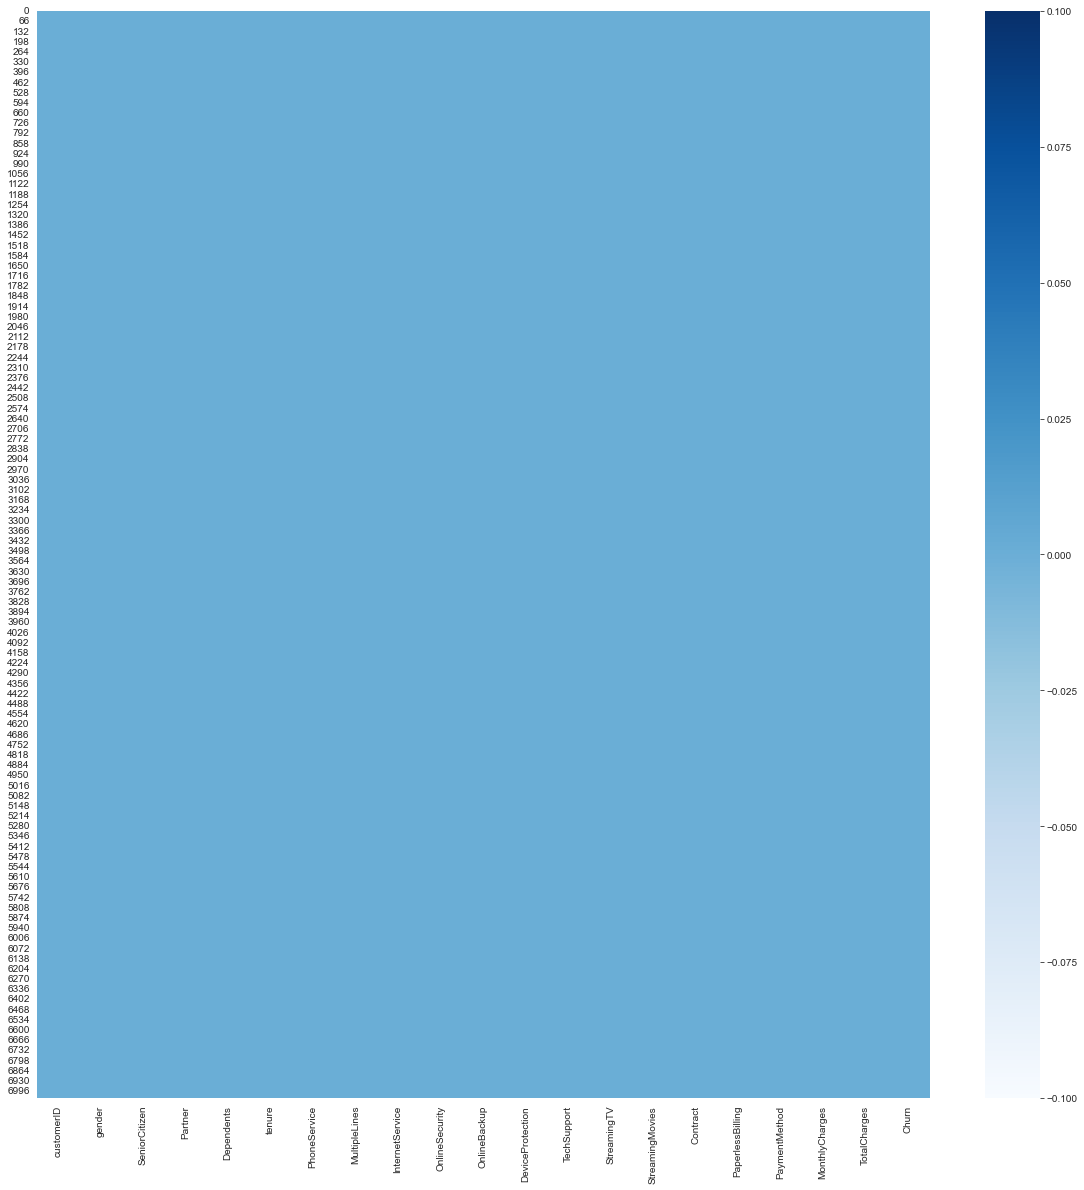

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),cmap='Blues')
plt.show()

* From above analysis of heatmap and nan there are not missing records in data.

* Analysis for Duplicate values 

In [9]:
df.duplicated().all()

False

In [10]:
df[df.duplicated()].shape

(0, 21)

* There are zero rows in data which suggest that there are no records having duplicate in data.

* Analysis of number of unique values in data variables.

In [11]:
for i in df.columns:
    print(i,":\n")
    print(len(df[i].unique()))
    print('______________________________\n')

customerID :

7043
______________________________

gender :

2
______________________________

SeniorCitizen :

2
______________________________

Partner :

2
______________________________

Dependents :

2
______________________________

tenure :

73
______________________________

PhoneService :

2
______________________________

MultipleLines :

3
______________________________

InternetService :

3
______________________________

OnlineSecurity :

3
______________________________

OnlineBackup :

3
______________________________

DeviceProtection :

3
______________________________

TechSupport :

3
______________________________

StreamingTV :

3
______________________________

StreamingMovies :

3
______________________________

Contract :

3
______________________________

PaperlessBilling :

2
______________________________

PaymentMethod :

4
______________________________

MonthlyCharges :

1585
______________________________

TotalCharges :

6531
____________________________

* TotalCharges is object data type feature having 6531 categories . also It has float values in data in string format which is not interpretable.

* Analysis of categories and Their counts.

In [12]:
for i in df.columns:
    print(i,"\n")
    print(df[i].unique())
    print('----------------------------------\n')
    print(df[i].value_counts(),'\n')
    print('----------------------------------\n')

customerID 

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 

----------------------------------

gender 

['Female' 'Male']
----------------------------------

Male      3555
Female    3488
Name: gender, dtype: int64 

----------------------------------

SeniorCitizen 

[0 1]
----------------------------------

0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

----------------------------------

Partner 

['Yes' 'No']
----------------------------------

No     3641
Yes    3402
Name: Partner, dtype: int64 

----------------------------------

Dependents 

['No' 'Yes']
----------------------------------

No     4933
Yes    2110
Name: Dependents, dtype: int64 

-------------------------------

1] The customerID is objectdataype with one category for each datapoint so it is like  index values which will be  eliminated.

2] TotalCharges feature have data type of Object . But the values in features are float type there is wrong desription of price feature. TotalCharges are prices and It can not be discrete feature or object in This scenario.

3] TotalCharges heve one category observed having no value . It is category with space value which missing data. which have to be imputed or eliminated from dataset.

* There is missing record in TotalCharges which is string with space which we will remove or can be impute depending upon counts .


In [13]:
df[df["TotalCharges"]==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


* As There are only 11 records with empty string or missing records hence we will remove this reocrds of customers.

In [14]:
df.drop(df.index[df['TotalCharges']==' '],axis=0,inplace=True)
df.reset_index(drop=True)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


* Eliminating unnecessory column

  1] CustomerID wil be removed from dataset as it is like index columns.

In [15]:
df.drop(columns=['customerID'],axis=1,inplace=True)


* Now we will covert data type of column TotalCharges from object to float64 

In [16]:
df['TotalCharges']=df['TotalCharges'].astype('float64')

In [17]:
df.shape

(7032, 20)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


* There are 4 features with numeric data type and 3 feature are continuous in nature while SeniorCitizen is categorical in nature.

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


1] Senior citizen is categorical in nature.upto 75% of records are 0 while rest are 1.The customers having 0 in SeniorCitzen feature are not old people while 1 vaue represent senior citizen .

2] tenure is number of months in which 0 months is minimum number of months for customer while 72 month is maximum value.with Standard Deviation of 24 which suggest that there are no otliers in tenure.

3] MOnthlyCharges is charges of customer on basis of month or price of plan for a month which are ranges from 18 to 118.75 with standard deviation of 30.09 .Also suggest that there are no outliers in MonthlyCharges

4] TotakCharges are prces with minmum value of 18 to maximum values of 8684.8 having standard deviation of 2266.77

* Seprating numeric and object datatype feature .

In [20]:
num=[]
obj=[]
for i in df.columns:
    if df[i].dtype==np.object:
        obj.append(i)
    else:
        num.append(i)
print(len(num))
print(num)
print("--------------------------")
print(len(obj))
print(obj)

4
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
--------------------------
16
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


* Analysing Distribution of numeric variables in dataset.

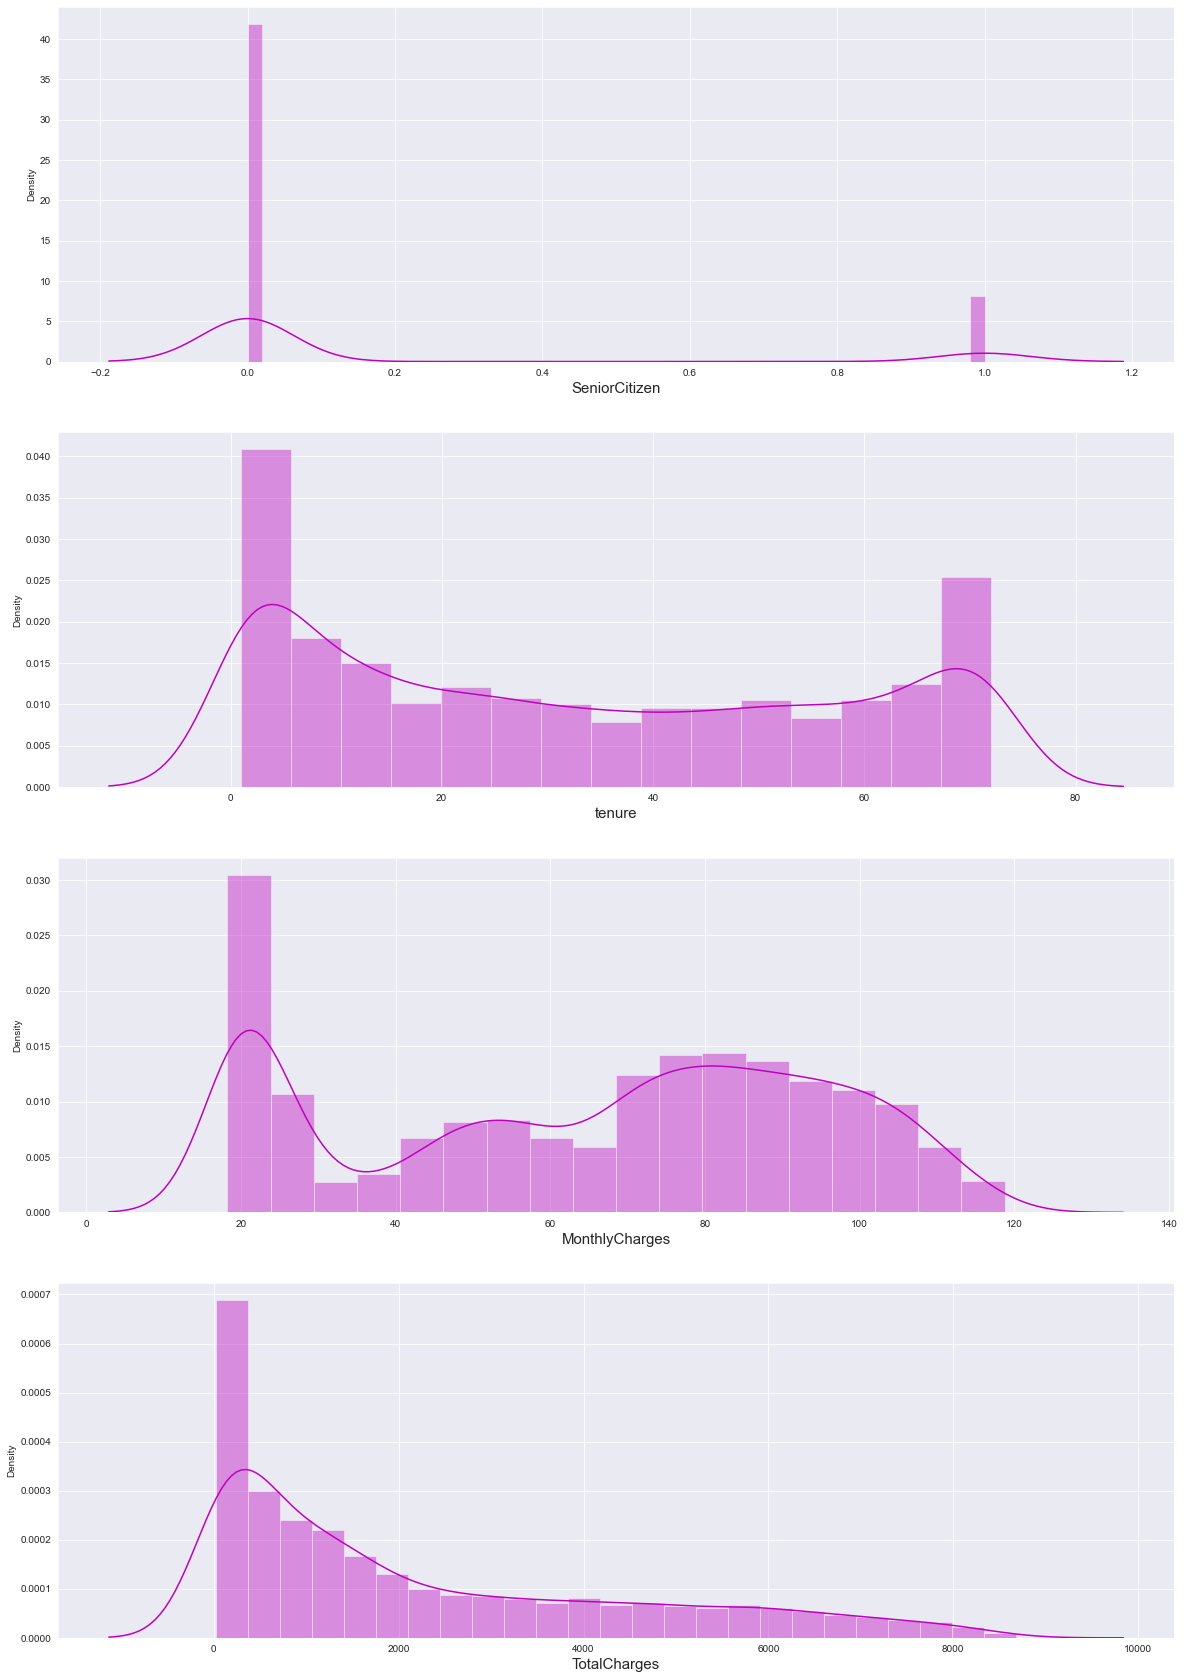

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in num:
    if graph<=len(num):
        ax=plt.subplot(4,1,graph)
        sns.distplot(df[column],kde=True,color='m')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Senior Citizen is categorical data.

2] TotalCharges is highly right skewed data.



* Count of categories in variables.

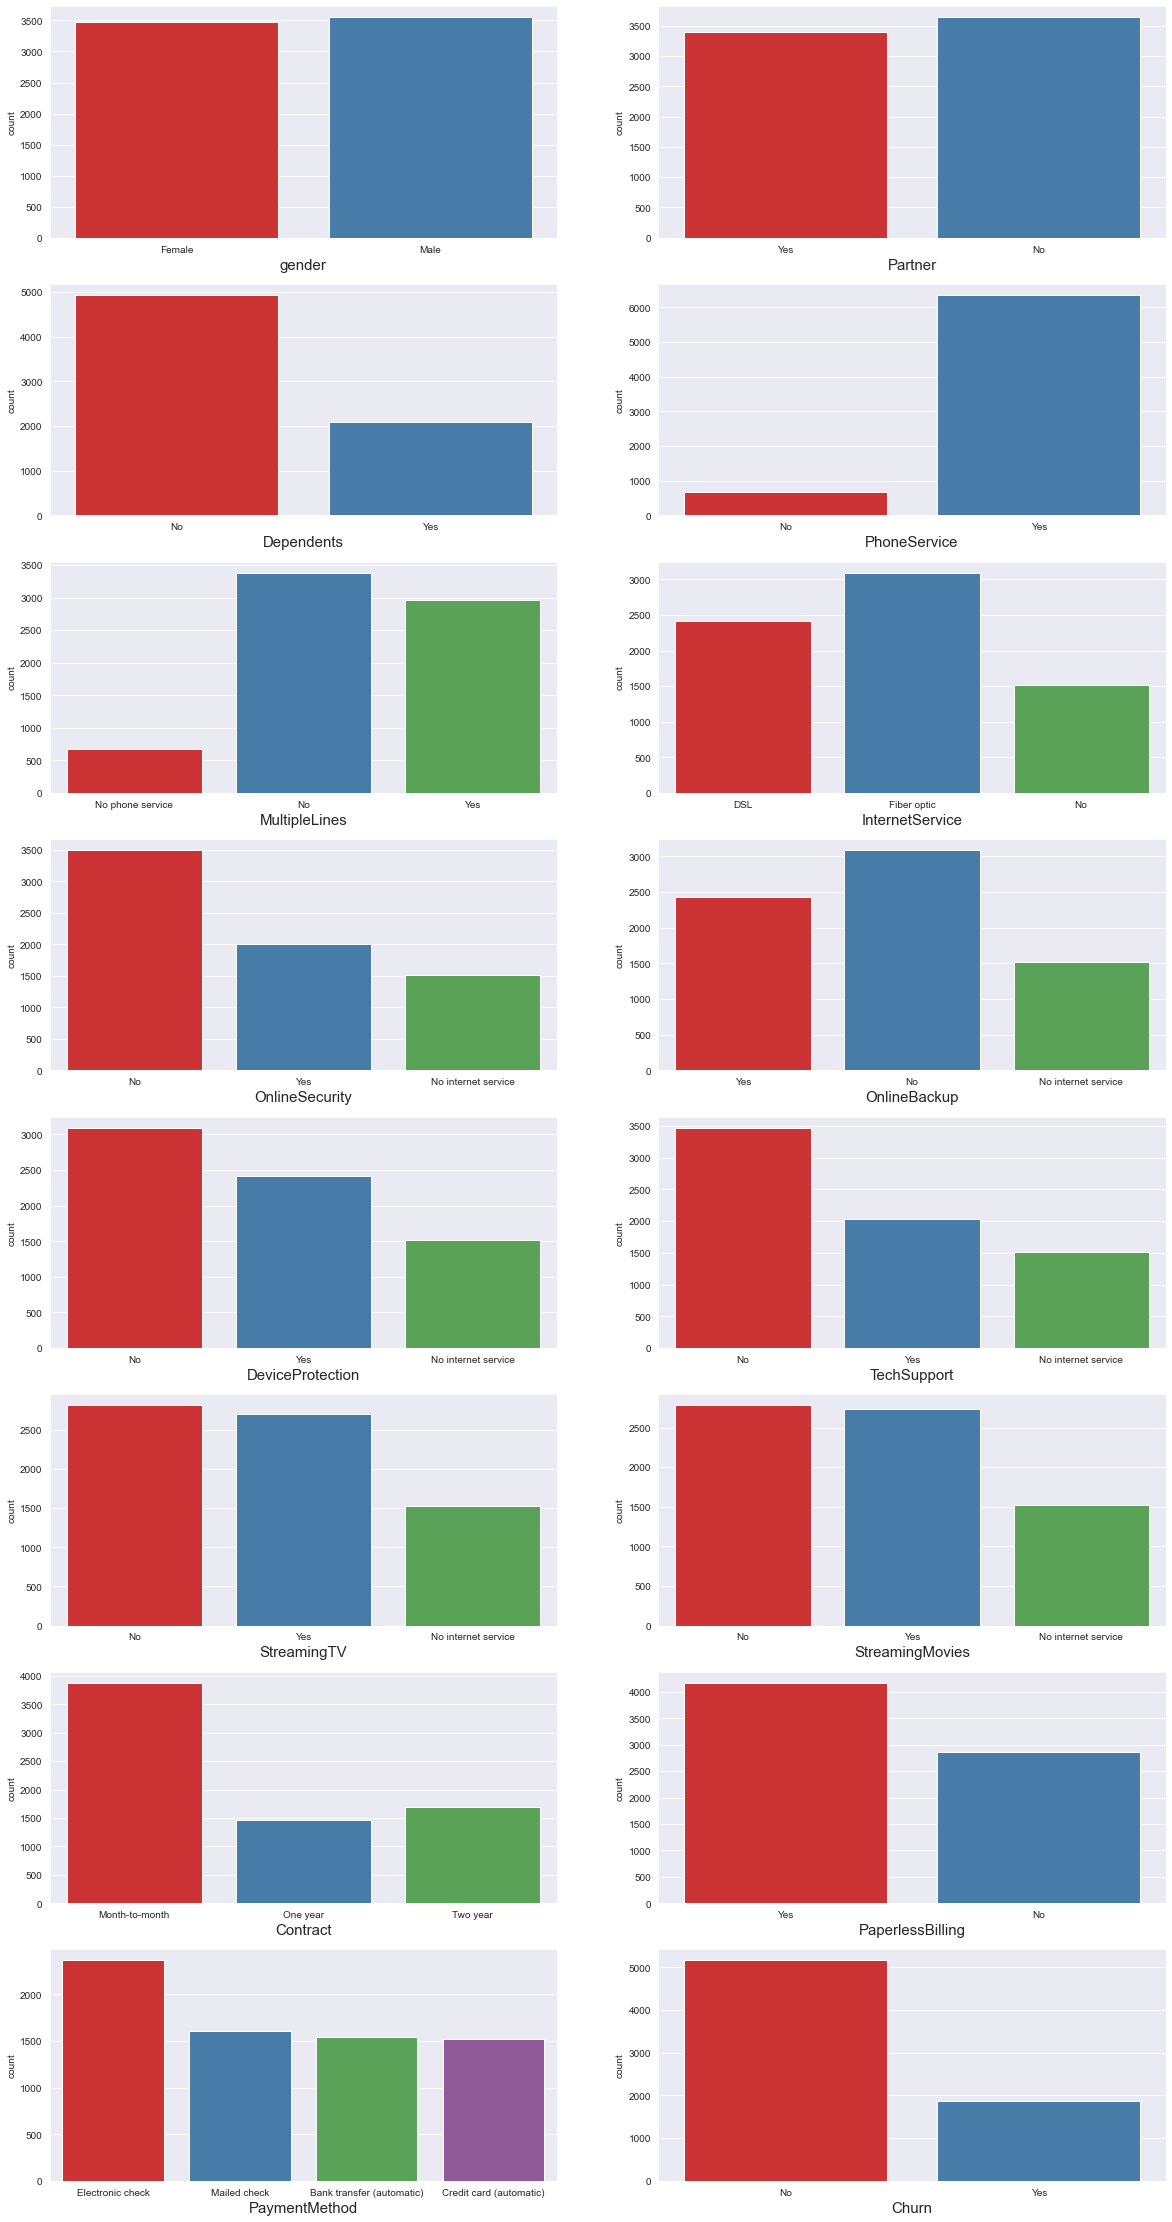

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(20,40))
sns.set_palette('Set1')
graph=1

for column in obj:
    if graph<=len(obj):
        ax=plt.subplot(8,2,graph)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Gender feature is categorical nature with approximately eqaul count of customer on basis of gender of customers amle and female.

2] The Partner feature is customer with service partners with  yes and No . Both categories having approximately same count.

3] Dependents have catgories yes and No depedents . The customers with No dependents have high count 5000 while 2000 customer belongs to Yes.

4] Cutomers with Yes phone service is High count above 6000 and Cutomers with No phone service have count of less tahn 1000 .

5] Multiple line is service for  customer with having phone service. Having 3 ctegories as follows:
    
     a) No phone service in catgory in Multipleline is same as  No in Phone service feature.
        
     b)  Yes category in phone service feature is  divide into Yes Multipleline and No multipleLine customrs, No multipleline customers are more than Yes multipleline customers.
    
6] InternetService feature have categorized customers as No ,DSL and Fibre Optic

     a) No category for custoers who dont have connected with internet service. Customer not using internet are fixed 1500.
    
     b) Fibre optics for customers who have connected with fibre optics service of internet.Highest count of fibre optics
        
     c) DSL for customers using Digital subscriber line  service of internet.lower than fibre optics count.
    
7] OnlineSecurity is categorized as No internet service ,Yes and No
   
     a)No internet service for Customers which are not connected to internet service as Online Security is required for customers having Internet connection.
        
     b) Yes for customers connected to internet connection with adding Online security in their service,count of users is less than that of not using.
    
     c) No for customers connected to internet connection but they dont required Online security hence not utilizing Online security services.Customers not using internet security is highest with count of upto 3500 
        
        
8] OnlineBackup is categorized as No internet service ,Yes and No
   
     a) No internet service for Customers which are not connected to internet service as Online Backup  is required for customers having Internet connection.
        
     b) Yes for customers connected to internet connection with adding Online Backup in their service .
    
     c) No for customers connected to internet connection but they dont required Online Backup hence not utilizing Online backup services. count of customers without backup is higher tha that of users.
     
9] DeviceProtection   is categorized as No internet service ,Yes and No
   
     a) No internet service for Customers which are not connected to internet service as Device Protection  is required for customers having Internet connection.
        
     b) Yes for customers connected to internet connection with adding Device Protection  in their service .
    
     c) No for customers connected to internet connection but they dont required Device Protection hence not utilizing Device Protection services. The count of customers without protection is less than taht of using protection service.
     
     
10] TechSupport is categorized as No internet service ,Yes and No
   
     a) No internet service for Customers which are not connected to internet service as Tech Support is required for customers having Internet connection. count of 
        
     b) Yes for customers connected to internet connection reqiures Tech Support . count of customers is lower.
    
     c) No for customers connected to internet connection but they dont required Tech Support.  count of of customer is higher than that of Users.
     
11]   StreamingMovies , StreamingTV have same categories .

     a) Streamong tv has appraoximately same count of customers for users and not user. 
     
     b)  StreamongMovies has appraoximately same count of customers for users and not user. 
     
12] contract have month to month cntaract, one year contract, two year contract 
    
    a) Month to month contract has highest count of upto 4000 while very one year has least count of upto 1500 and customers with two year contract has count of upto 2000
    
13]  customer using paparless billing facilities user are more than that of paper billing facilities.

14] Payment method is categorized as electronc mail with highest count and other categories are bank transfer credit card transfer and Mailed check have approximately same count.


15] The Churn feature is label  having two categpries of weather customer had quit the service ( Yes ) or Continue to utilizing service of company (No). The customers haved quit service are less. upto 30 %. 
 This variance in count of No and YEs category suggest that the Imbalanced in dataset.

* Analysis of percentage or contribution  of categories in variables.

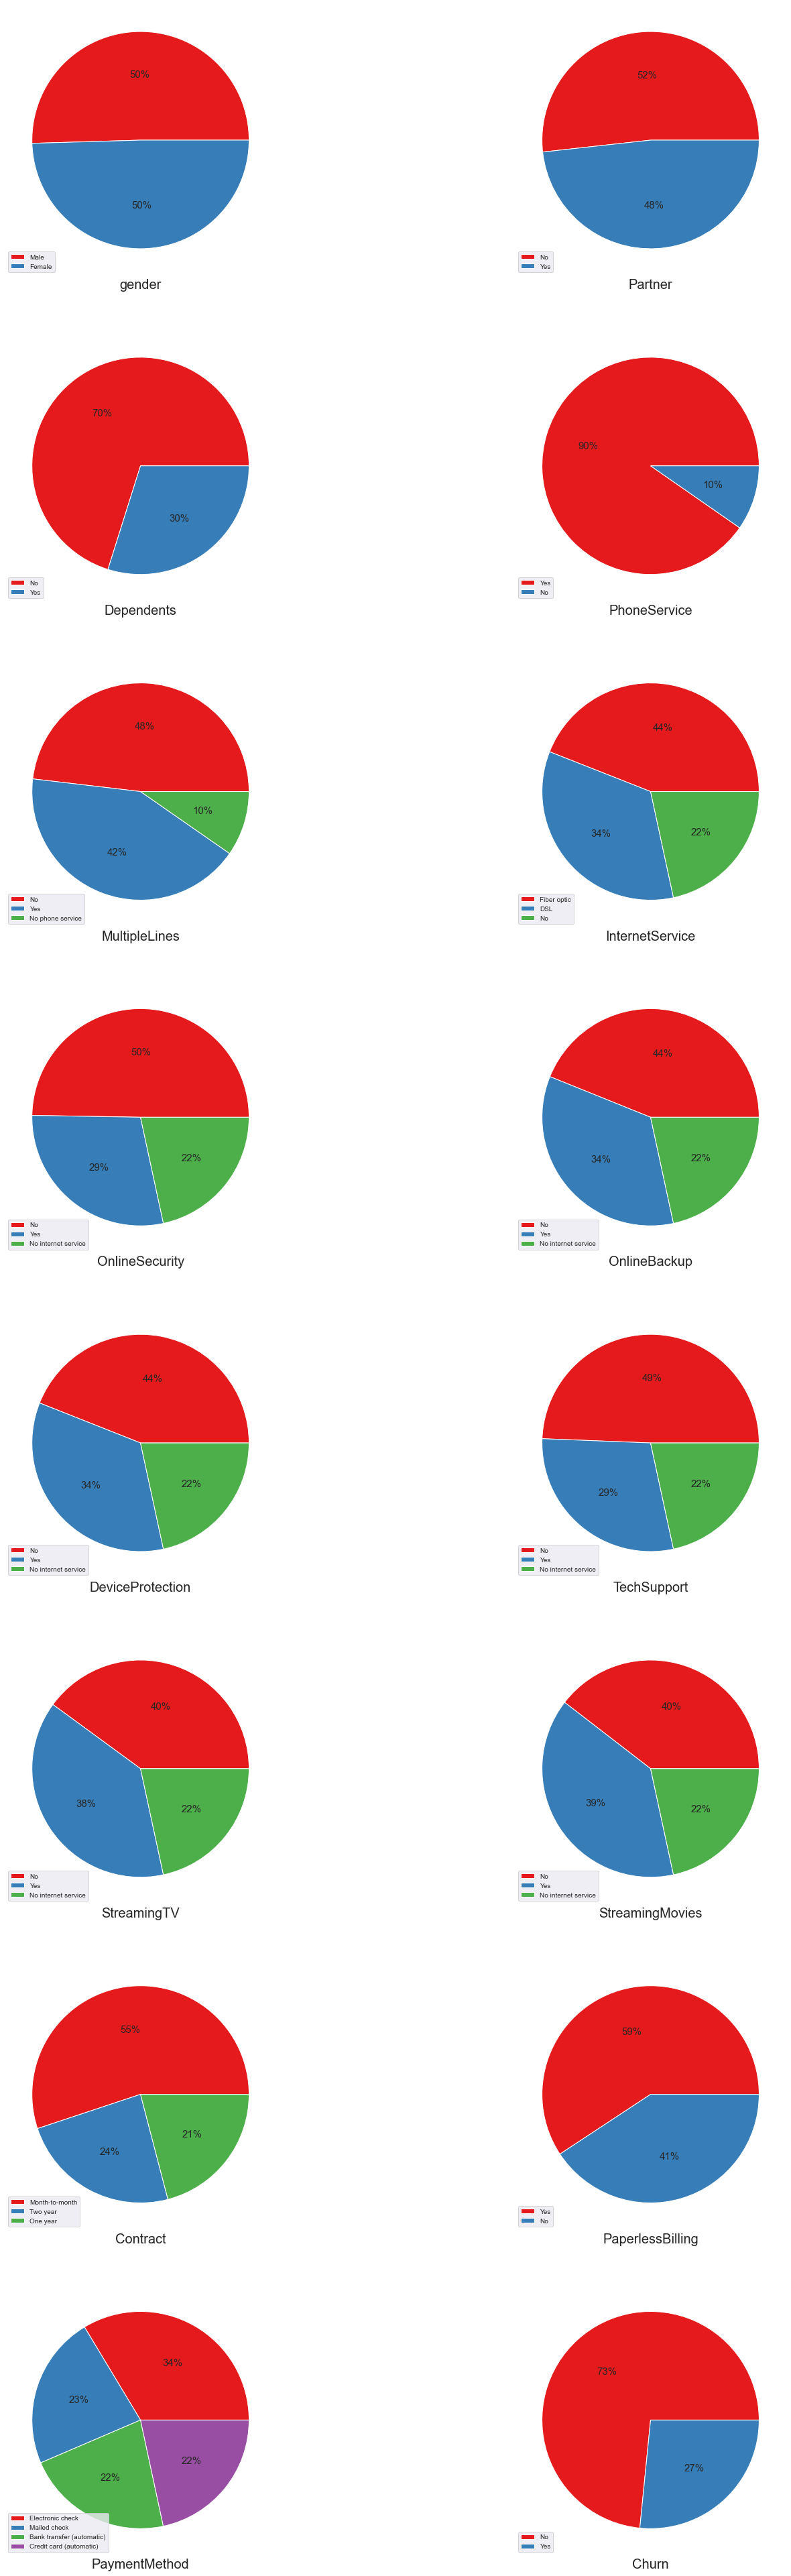

<Figure size 432x288 with 0 Axes>

In [23]:
plt.figure(figsize=(25,70))

graph=1

for column in obj:
    if graph<=len(obj):
        ax=plt.subplot(8,2,graph)
        plt.pie(x=df[column].value_counts(),autopct='%0.00f%%',radius=1.0,colors=sns.color_palette('Set1'),textprops={'size':15},labeldistance=1.8)
        plt.legend(df[column].value_counts().index,loc=3,fontsize=10)
        plt.xlabel(column,fontsize=20)
      
        
    graph+=1
plt.show()
plt.tight_layout()

* The percentage of each category can be observed in above graph.

* As Maximum categories 04 are in all categrical  features so it can be used for dividing dataset into continuous and categorial features.
 
 1] If more than 04 categories in variable it will be continuous in this dataset
    
 2] Else less than 04 categories in variable then it is categorical variable.   

In [24]:
cont=[]
cat=[]
for i in df.columns:
    if len(df[i].unique())>5:
        cont.append(i)
        
    else:
        cat.append(i)
        
print(len(cont))
print(cont)
print('-'*30)
print(len(cat))
print(cat)

3
['tenure', 'MonthlyCharges', 'TotalCharges']
------------------------------
17
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


* Churned distributio of categorical features.

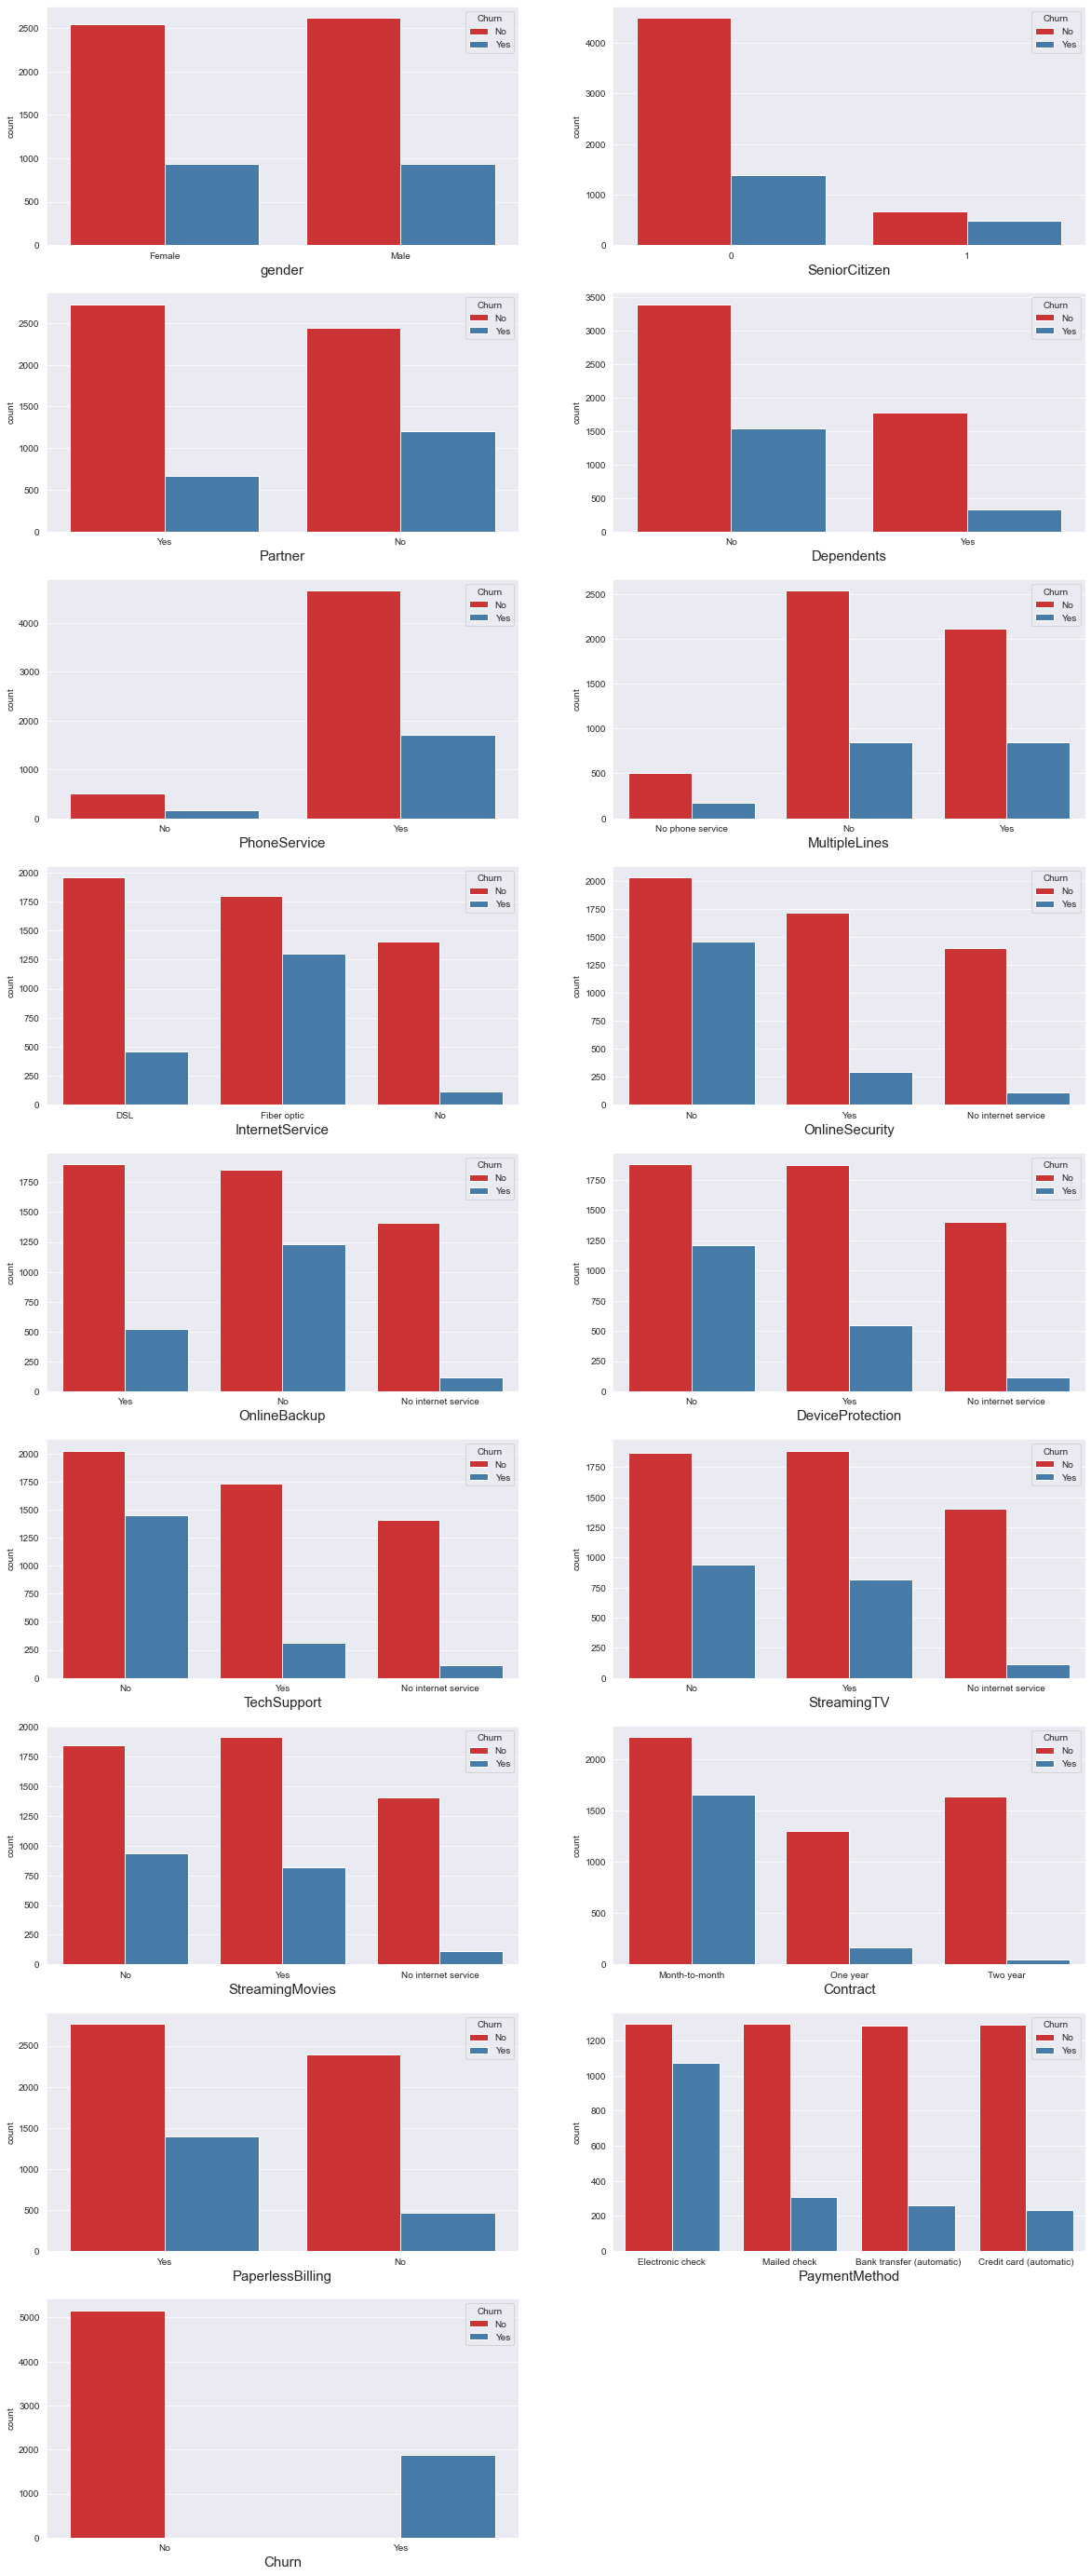

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(20,50))
graph=1
for column in cat:
    if graph<=len(cat):
        ax=plt.subplot(9,2,graph)
        sns.countplot(x=df[column],data=df,hue=df['Churn'],palette='Set1',dodge=True)
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

Obsetvstions:

1] The churned rate in Gender feature with Male and Female category is same with respect total count of each category.

2] SeniorCitizen :
     a) The customers who have quit the service have higher proportion in total count of seniorcitizen with value 1 category.
     
     b) The customer quiting service has lower ratio in younger people.
     
3] The less churned rate is observed in customers having partner than that of No partner.

4] Approximately equal churned rate observe in Dependent category as Yes and No.

5] The higher churned rate obseve in multiple line user as compared other categories.

6] The churned rate is upto 45% in fibre optics inetnet service.

7] The chrned rate is higher in internet service users without online security service.

8] The higher churned rate is observed in users without online backup facility.

9] The higher churned rate is observed in internet service users without device protection facility.

10] The higher churned rate is observed in internet service users without Technical support  facility.

11] the churned rate is very high incase of customers using month to month contract. Churned rate is decreases as contract duration increases .

12] The churned rate of customers who used to pay with electronic check as compared to other modes of  payment.

* Violinplot of  Continuous features  with label Churn

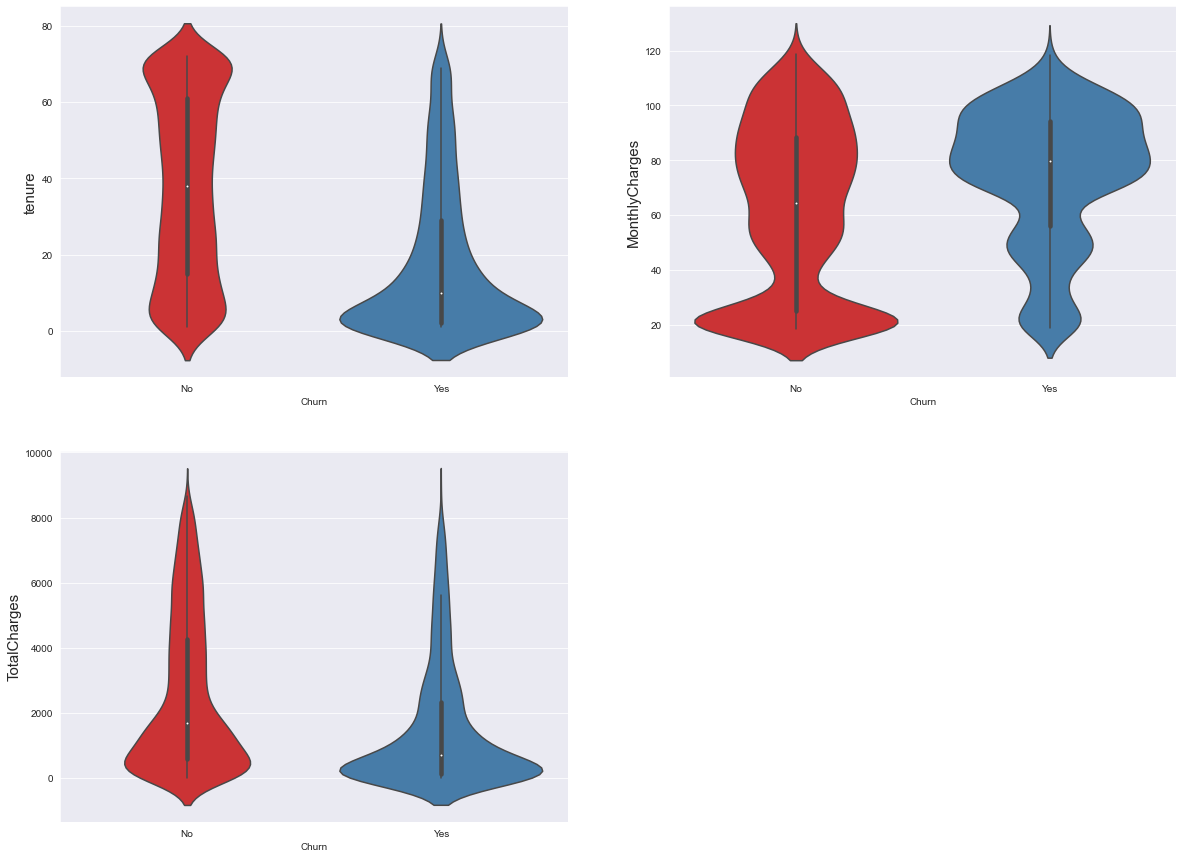

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(20,15))
sns.set_palette('Set1')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.violinplot(y=df[column],x=df["Churn"])
        plt.ylabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

A] Tenure :
        
    1] The distribution of  tenure of customer who have quit service is highly right skewed.

    2] The tenure of churned customers has lower median than that of unchurned customers.
    
    3] The churned customers have low tenure.The customers with  low tenure  have high probability to churned.    
    
b] MonthlyCharges :
    
       
    1] The distribution of  MonthlyCharges of customer who have quit service is highly left skewed.

    2] The MonthlyCharges of churned customers has higher  median than that of unchurned customers.
    
c]  The TotalyCharges of churned customers has lower  median than that of unchurned customers. It suggest that customers havig low totalcharges have high probability to churned.    
    

* Continuous with Label Churn

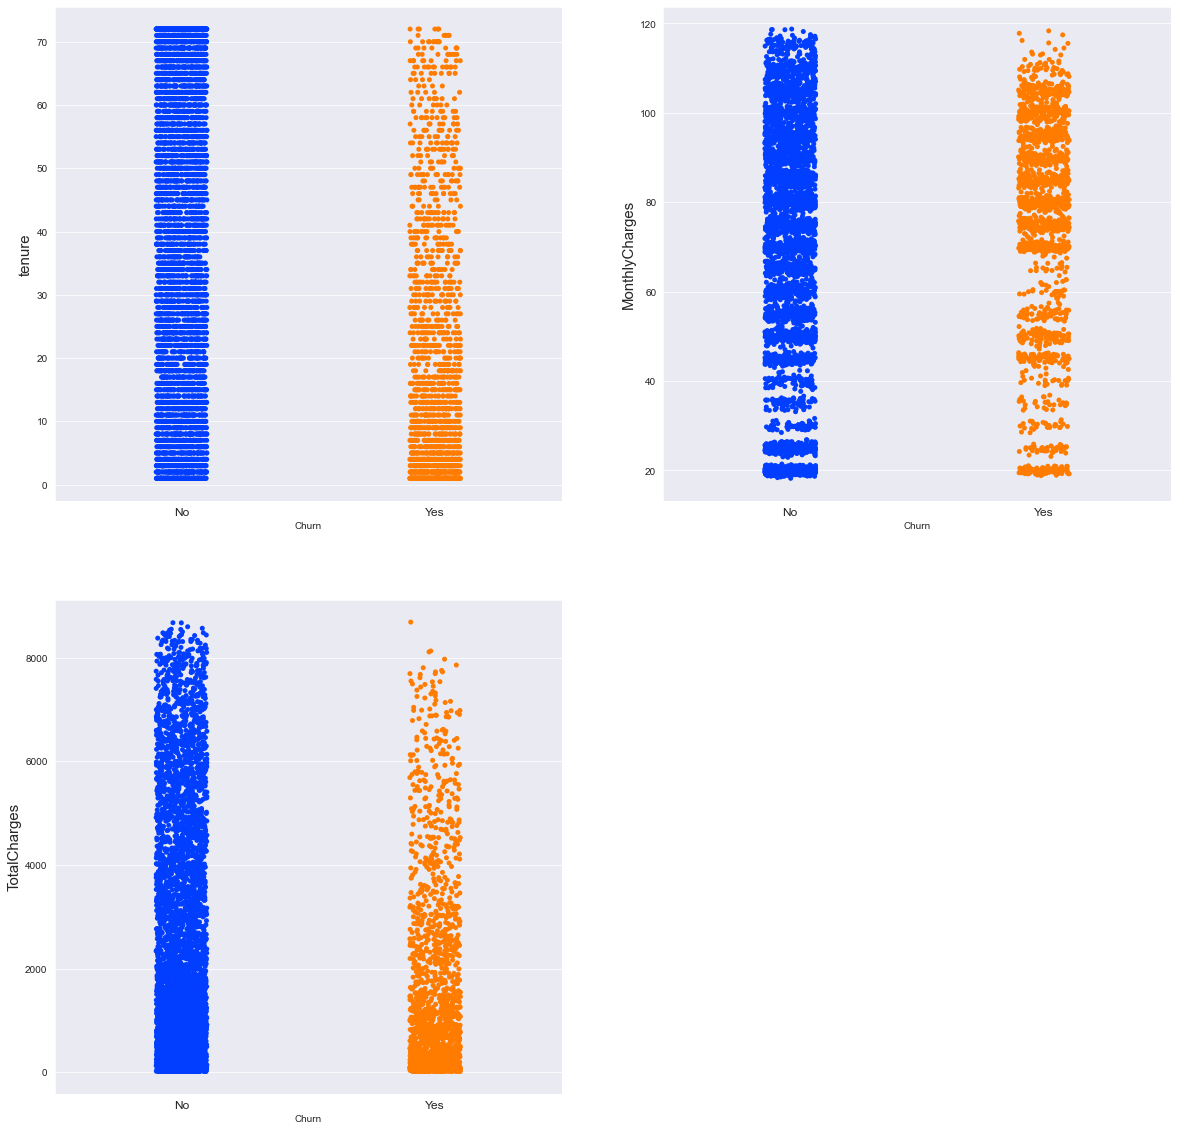

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(20,20))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.stripplot(y=df[column],x=df['Churn'])
        plt.ylabel(column,fontsize=15)
        plt.xticks(fontsize=12)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Number of customers who have churned are less dataset.

2] Customers with low total charges and low tenure and high monthly charges are most likely to churn.

* Distributon of continuous features 

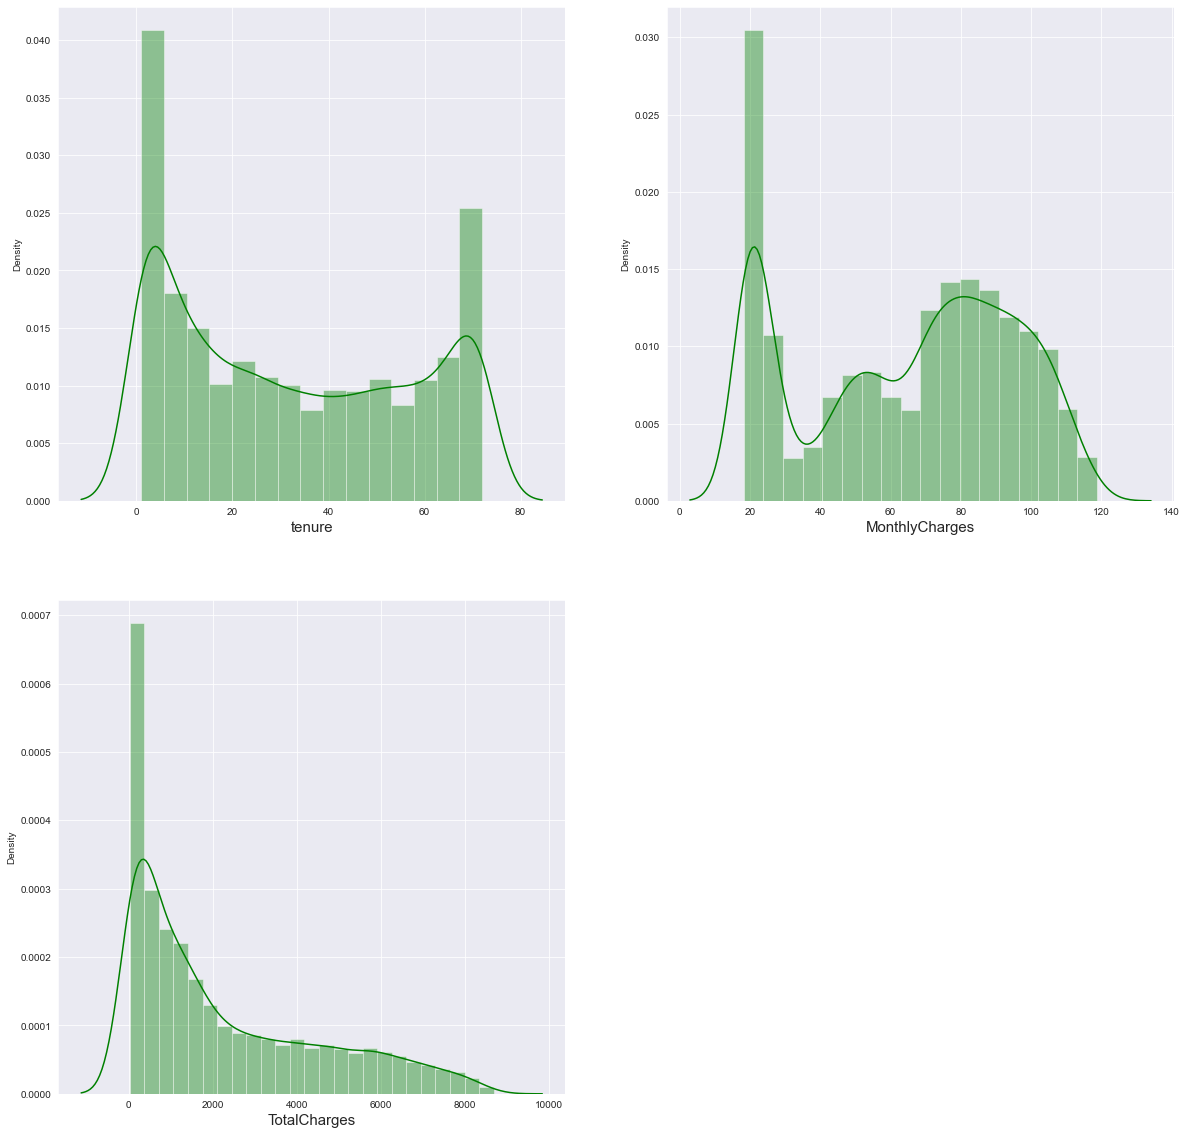

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(20,20))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(2,2,graph)
        sns.distplot(df[column],color='green')
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

1] TotalCharges is positively skewed .TotalCharges with zero value have high peak in disribution.It is required to continuous features to have normal distribution for better working ofalgorithms. 


2] Tenure and MonthkyChargees have not normally distributed.

* Outlier Detection with Boxplot

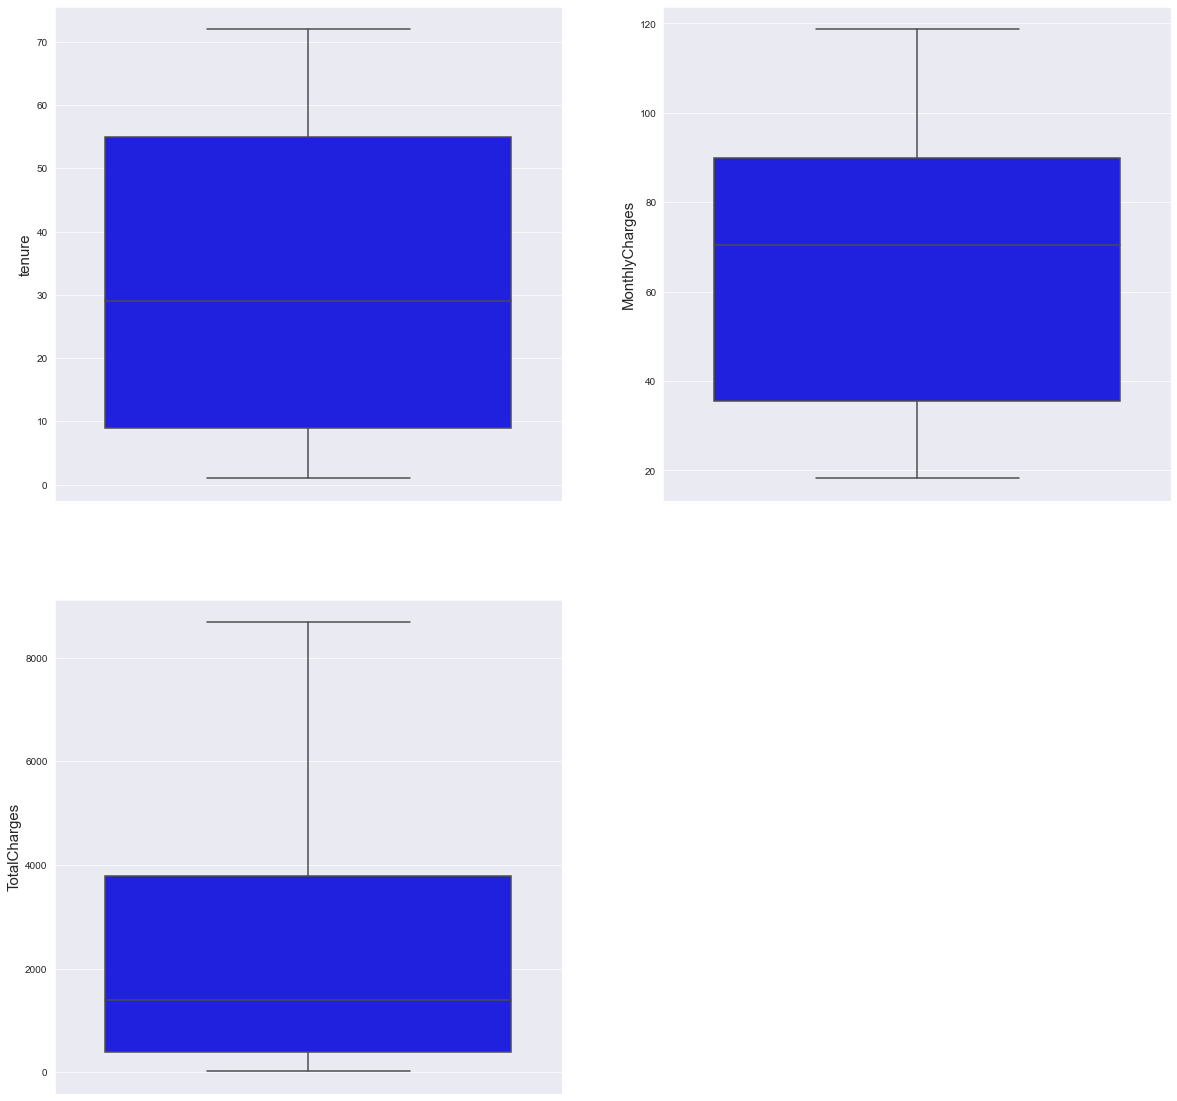

In [29]:
plt.figure(figsize=(20,20))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.boxplot(y=df[column],color='blue')
        plt.ylabel(column,fontsize=15)
        
    graph+=1
plt.show()

* The Outliers detection with Boxplot whch uses function of interquartile range  for outliers detection .

1]  Outliers are not detected in continuois features. although the Distribution is not skewed.

* Viloin plot for Continuous distribution.

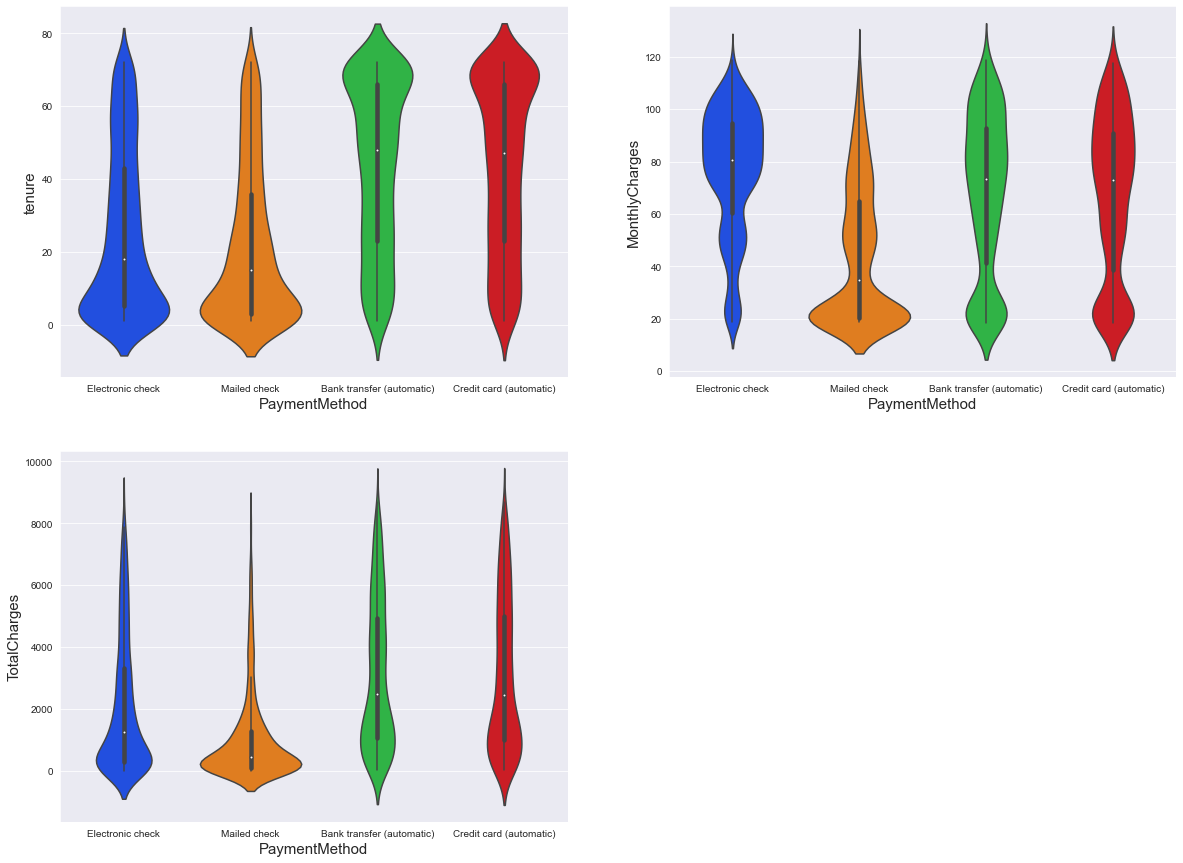

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(20,15))

graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.violinplot(y=df[column],x=df['PaymentMethod'])
        plt.ylabel(column,fontsize=15)
        plt.xlabel('PaymentMethod',fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

Observations :

a] tenure :

     1] The distribution of tenure for customers using paymethod as Automatic Bank Transfer and Credit card transfer have higher median than that of electronic check and ailed check facility users.
     
     2] The distributions of Customers using electronic and mailed Check transfers are right skewed , There is peak in lower tenure region.
     
     3] The distributions of customer using credit card and bank transfers have same distribution and median is also apprx. equal which higher than that of electronic nad mailed check methods.
 
b] MonthlyCharges :

     1] The distribution of MonthlyCharges of customers using  Electronic check payment method is left skewed with highest median than that of customer using other methods.
     
     2] The distribution of MonthlyCharges of customers using  mailed check payment method is right  skewed with lowest median than that of customer using other methods.
     
      3] The distributions of customer using credit card and bank transfers have same distribution and median is also apprx. equal which higher than that of mailed check and lower than that of electronic check.
 
     
c] TotalCharges :
 
     1] The distribution of MonthlyCharges of customers using  mailed check payment method is right  skewed with lowest median than that of customer using other methods.
     
     2] Electronic mailed category also exhibit right skewness in distribution.
     
     3] The distributions of customer using credit card and bank transfers have same distribution and median is also apprx. equal.


* ViolinPlot with PaperlessBilling

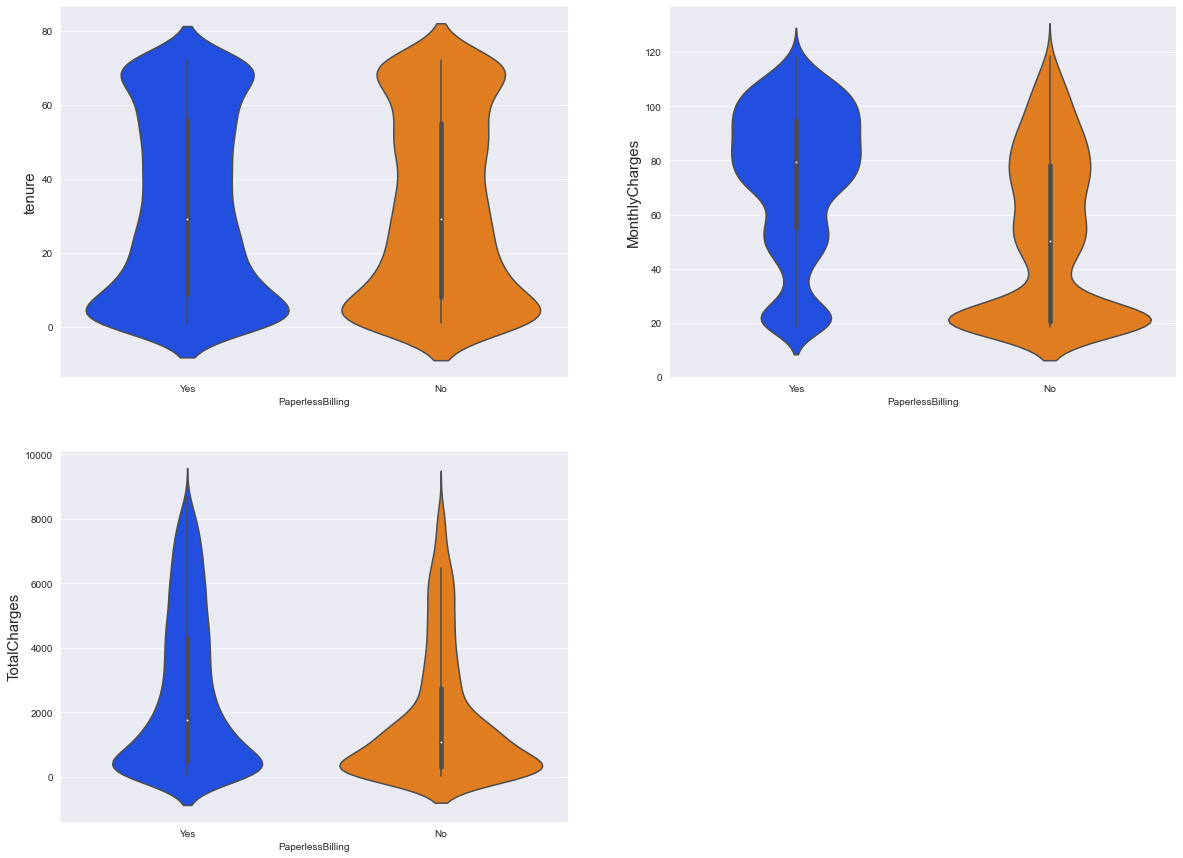

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(20,15))

sns.set_style("darkgrid")
graph=1

for column in cont:
    if graph<=3:
        ax=plt.subplot(2,2,graph)
        sns.violinplot(y=df[column],x=df['PaperlessBilling'])
        plt.ylabel(column,fontsize=15)
        
    graph+=1
plt.show()
plt.tight_layout()

Observation :
    
    1] The data distribution for MonthlyCharges with Customer using paperless billing method is left Skewed.
    
    2] customer who uses paperless billing have higher MonthlyCharges  as Median is shifted towards High side.
    
    3] Customer having lower Monthly charges uses paper billing methods as Median is Shifted towards lower side as compared to that of Yes category.

* Analyse outliers treatment with Zscore method  and data loss after treatment.

* The zscore method in scipy.stats.zscore() function computes the relative Z-score of the input data, relative to the sample mean and standard deviation.

1] After computation of data the outliers can be detected with empirical rule of z distribution.
   
    a) The 68% of data lies between 1 Standard deviation of data
    
    b) The 95% of data lies between 2 standard deviation of data

    c) The 99.7% of data lies between 3 standard deviation of data


In [32]:
data=df.copy()
rows_before1=data.shape[0]
rows_before1

7032

In [33]:
from scipy.stats import zscore

z1=np.abs(zscore(data[cont]))
data=data[(z1<3).all(axis=1)]


In [34]:
rows_after1=data.shape[0]
rows_after1

7032

In [35]:

loss1=((rows_before1-rows_after1)/rows_before1)*100
loss1


0.0

*  Outliers are not  detected in continuos features with z_score method.

* unique values in Categorical features before Encoding

In [36]:
for i in obj:
    print(i,":\n")
    print(df[i].unique())
    print('______________________________\n')

gender :

['Female' 'Male']
______________________________

Partner :

['Yes' 'No']
______________________________

Dependents :

['No' 'Yes']
______________________________

PhoneService :

['No' 'Yes']
______________________________

MultipleLines :

['No phone service' 'No' 'Yes']
______________________________

InternetService :

['DSL' 'Fiber optic' 'No']
______________________________

OnlineSecurity :

['No' 'Yes' 'No internet service']
______________________________

OnlineBackup :

['Yes' 'No' 'No internet service']
______________________________

DeviceProtection :

['No' 'Yes' 'No internet service']
______________________________

TechSupport :

['No' 'Yes' 'No internet service']
______________________________

StreamingTV :

['No' 'Yes' 'No internet service']
______________________________

StreamingMovies :

['No' 'Yes' 'No internet service']
______________________________

Contract :

['Month-to-month' 'One year' 'Two year']
______________________________

PaperlessBillin

* Encoding Object datatype features with numeric data.

LableEncoder is transformer in sklearn library which accepts data and convert it  integer values between 0 and (n_classes-1 ).

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj:
    df[i]=le.fit_transform(df[i])

* Unique values in  categorical features after encoding

In [38]:
for i in obj:
    print(i,":\n")
    print(df[i].unique())
    print('______________________________\n')

gender :

[0 1]
______________________________

Partner :

[1 0]
______________________________

Dependents :

[0 1]
______________________________

PhoneService :

[0 1]
______________________________

MultipleLines :

[1 0 2]
______________________________

InternetService :

[0 1 2]
______________________________

OnlineSecurity :

[0 2 1]
______________________________

OnlineBackup :

[2 0 1]
______________________________

DeviceProtection :

[0 2 1]
______________________________

TechSupport :

[0 2 1]
______________________________

StreamingTV :

[0 2 1]
______________________________

StreamingMovies :

[0 2 1]
______________________________

Contract :

[0 1 2]
______________________________

PaperlessBilling :

[1 0]
______________________________

PaymentMethod :

[2 3 0 1]
______________________________

Churn :

[0 1]
______________________________



* Analysing rows and columns after Encoding.

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [40]:
df.shape

(7032, 20)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


* All features are numeric in nature .

* Correlation Analysis of variables

In [42]:
cor=df.corr().abs()

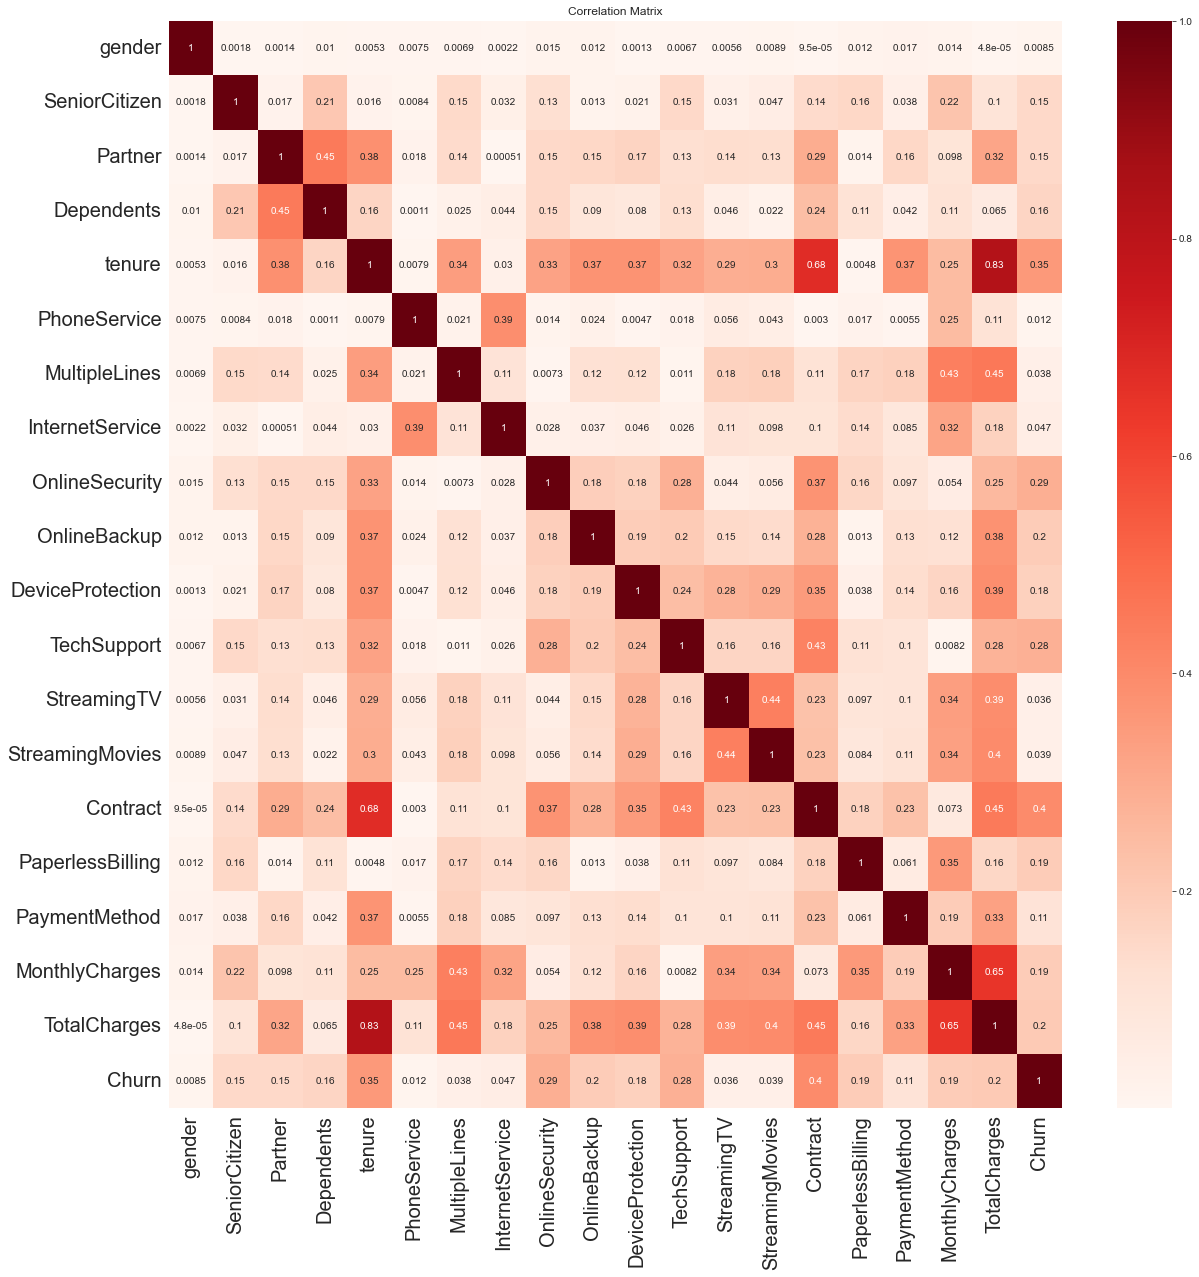

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,cmap='Reds')
plt.xticks(fontsize=20,rotation='90')
plt.yticks(fontsize=20)
plt.title("Correlation Matrix")
plt.show()

1] There is Correlation of 0.83 between tenure and TotalCharges 

2] There is Correlation of 0.68 between contract and tenure

3] There is Correlation of 0.65 between Monthly charges and TotalCharges

* Analysng relationship between tenure and TotalCharges

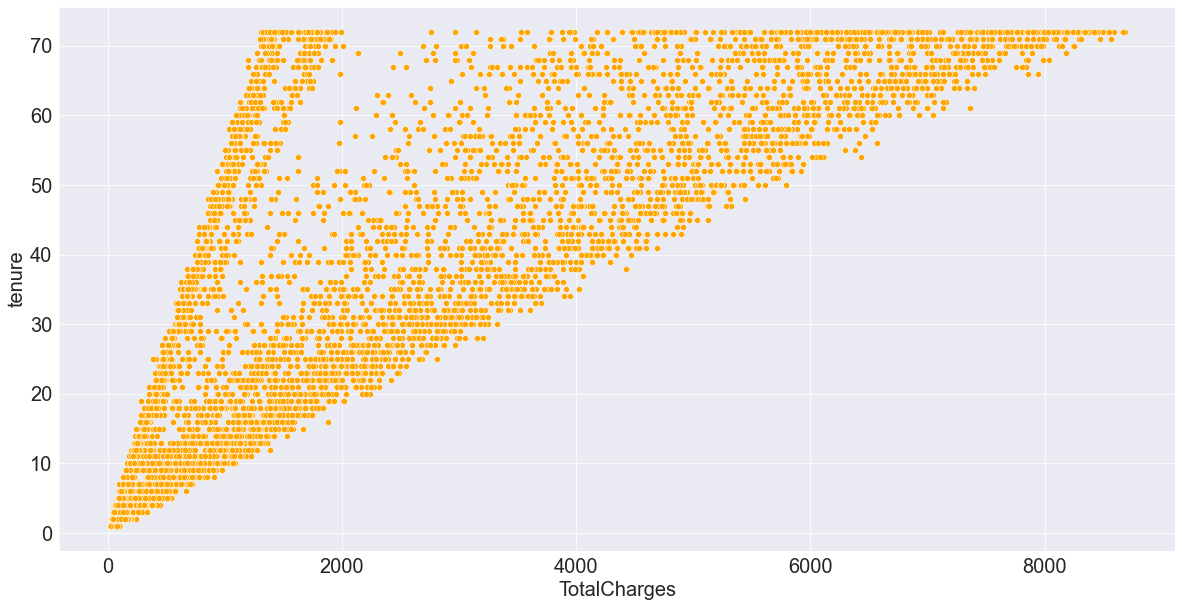

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.scatterplot(y=df['tenure'],x=df['TotalCharges'],color='orange')
plt.ylabel("tenure",fontsize=20)
plt.xlabel("TotalCharges",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

* There is strong relationship is exhibited by Tenure and TotalCharges of service. AS Tenure of customer increase there is direct increase in Totalharges but Vice versa is not True.

* Analysing relationship between tenure and Contract

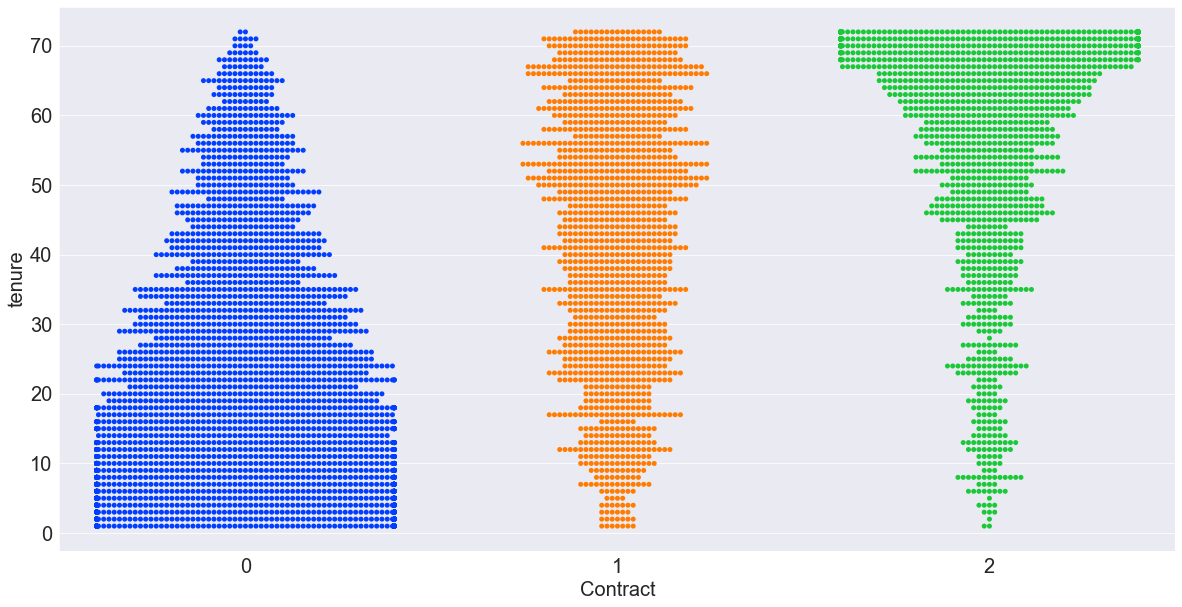

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.swarmplot(y=df['tenure'],x=df['Contract'])
plt.ylabel("tenure",fontsize=20)
plt.xlabel("Contract",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

* The Tenure feature has values in month of service  and Contarct has 3 categories which have month to month contarct, 1 year contract, and 2 year contract which are alos serevice duration Hence there is correelation between them.

1] customer having High tenure are strongly corresponds to 2 year contract ad 1 year contract.

2] the customers having low tenure  are strongly corresponds to month to month contract.

* Analysis of relationship between TotalCharges and MonthlyCharges

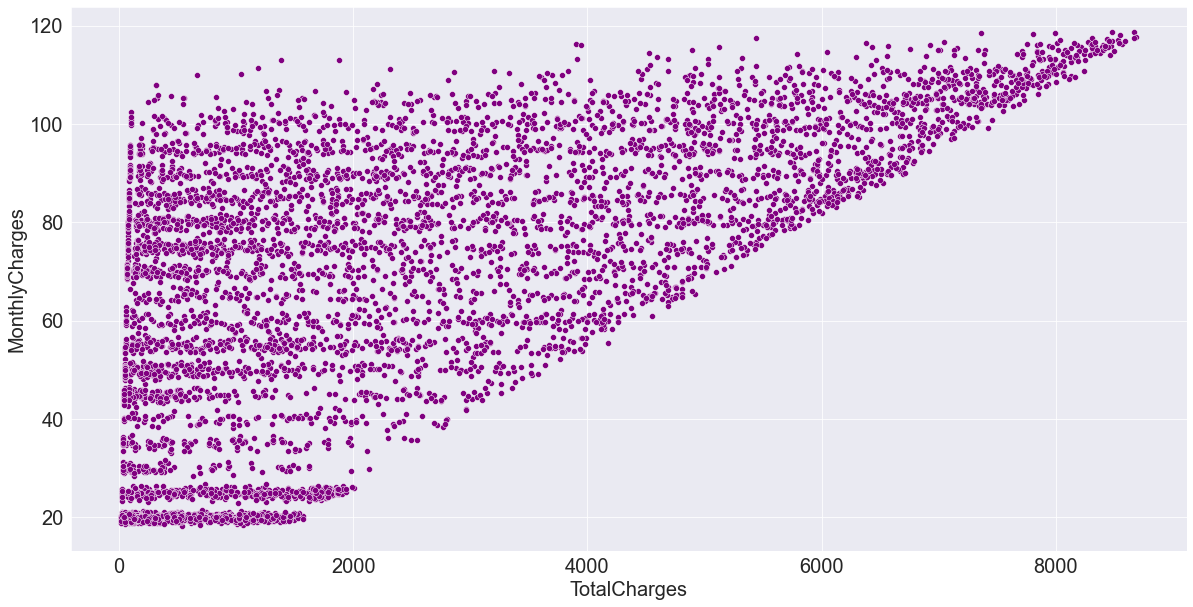

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(20,10))
sns.set_palette('bright')
sns.scatterplot(y=df['MonthlyCharges'],x=df['TotalCharges'],color='purple')
plt.ylabel("MonthlyCharges",fontsize=20)
plt.xlabel("TotalCharges",fontsize=20)
plt.yticks(fontsize=20)  
plt.xticks(fontsize=20)  
plt.show()
plt.tight_layout()

1] There is irectrelationship can be observed between MonthlyCharges and TotalCharges after TotalCharges reached to specific value .As increase in TotalCharges have direct increament in MonthlyCharges.

2] But Increae in MonthlyCharges can not make  increament in TotalCharge ssimilarly.

* Correlation with Churn label

In [47]:
cor_label=(df.drop('Churn',axis=1)).corrwith(df['Churn']).abs()
cor_label

gender              0.008545
SeniorCitizen       0.150541
Partner             0.149982
Dependents          0.163128
tenure              0.354049
PhoneService        0.011691
MultipleLines       0.038043
InternetService     0.047097
OnlineSecurity      0.289050
OnlineBackup        0.195290
DeviceProtection    0.177883
TechSupport         0.282232
StreamingTV         0.036303
StreamingMovies     0.038802
Contract            0.396150
PaperlessBilling    0.191454
PaymentMethod       0.107852
MonthlyCharges      0.192858
TotalCharges        0.199484
dtype: float64

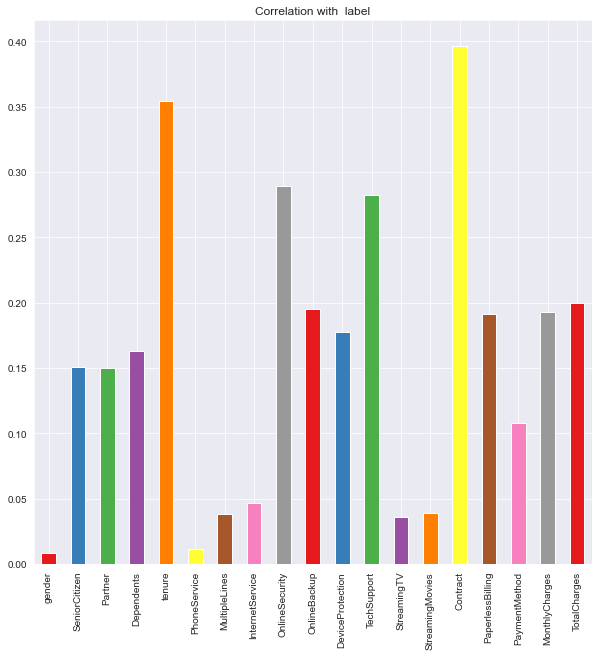

In [48]:
plt.figure(figsize=(10,10))
cor_label.plot(kind="bar",color=sns.color_palette('Set1'))
plt.title("Correlation with  label")
plt.show()

1] The features like Gender and phone Service have very low correlation 0.008 and 0.01 with label Churn

2] Tenure and Contract these two feature have higher correlation with label 0.35 and 0.39 which is also low correlation 

3] These two features also have correlation between them and also exhibit positive relationship 

4] Multiplelines,InternetService,StreamingTv,StreamingMovues have very less corelation with label Churn. 

* Analyse Multicollinearity with Variance Inflation Factor,Threshold for vif score is defined as 5


In [49]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

Predictors1=df.drop(columns=['Churn'],axis=1)
predictor1=Predictors1.to_numpy()
VIF1=pd.DataFrame()
VIF1["Features"]=Predictors1.columns
VIF1["vif_scores"]=[variance_inflation_factor(predictor1,i) for i in range(Predictors1.shape[1])]
VIF1.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
17,MonthlyCharges,20.503844
5,PhoneService,15.150758
4,tenure,15.084412
18,TotalCharges,13.869098
7,InternetService,4.350001
14,Contract,4.194484
13,StreamingMovies,3.265595
12,StreamingTV,3.237958
16,PaymentMethod,3.095143
15,PaperlessBilling,2.875010


* Analyse vif score after eliminating MonthlyCharges

In [50]:
Predictors2=df.drop(columns=['Churn','MonthlyCharges'],axis=1)
predictor2=Predictors2.to_numpy()
VIF2=pd.DataFrame()
VIF2["Features"]=Predictors2.columns
VIF2["vif_scores"]=[variance_inflation_factor(predictor2,i) for i in range(Predictors2.shape[1])]
VIF2.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
4,tenure,13.942277
17,TotalCharges,9.995409
5,PhoneService,8.202506
14,Contract,4.073047
7,InternetService,3.646896
13,StreamingMovies,3.117757
12,StreamingTV,3.095955
16,PaymentMethod,3.021672
2,Partner,2.814039
10,DeviceProtection,2.617893


* Analyse vif score after eliminating tenure

In [51]:
Predictors3=df.drop(columns=['Churn','MonthlyCharges','tenure'],axis=1)
predictor3=Predictors3.to_numpy()
VIF3=pd.DataFrame()
VIF3["Features"]=Predictors3.columns
VIF3["vif_scores"]=[variance_inflation_factor(predictor3,i) for i in range(Predictors3.shape[1])]
VIF3.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
4,PhoneService,8.200629
16,TotalCharges,5.316537
6,InternetService,3.491818
12,StreamingMovies,3.100860
11,StreamingTV,3.075287
15,PaymentMethod,3.021575
13,Contract,3.014782
2,Partner,2.749816
9,DeviceProtection,2.617616
14,PaperlessBilling,2.605425


* Analyse vif score after eliminating PhoneService

In [52]:
Predictors4=df.drop(columns=['Churn','MonthlyCharges','tenure','PhoneService'],axis=1)
predictor4=Predictors4.to_numpy()
VIF4=pd.DataFrame()
VIF4["Features"]=Predictors4.columns
VIF4["vif_scores"]=[variance_inflation_factor(predictor4,i) for i in range(Predictors4.shape[1])]
VIF4.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
15,TotalCharges,5.075258
11,StreamingMovies,3.100816
10,StreamingTV,3.075266
12,Contract,2.997897
2,Partner,2.739901
8,DeviceProtection,2.616390
14,PaymentMethod,2.615868
5,InternetService,2.529810
4,MultipleLines,2.492203
7,OnlineBackup,2.437734


* Analyse vif score after eliminating TotalCharges

In [53]:
Predictors5=df.drop(columns=['Churn','MonthlyCharges','tenure','PhoneService','TotalCharges'],axis=1)
predictor5=Predictors5.to_numpy()
VIF5=pd.DataFrame()
VIF5["Features"]=Predictors5.columns
VIF5["vif_scores"]=[variance_inflation_factor(predictor5,i) for i in range(Predictors5.shape[1])]
VIF5.sort_values(by='vif_scores',ascending=False)

,Features,vif_scores
11,StreamingMovies,2.983633
10,StreamingTV,2.955417
12,Contract,2.822266
2,Partner,2.662983
8,DeviceProtection,2.537876
14,PaymentMethod,2.499248
13,PaperlessBilling,2.350783
9,TechSupport,2.348584
5,InternetService,2.328254
7,OnlineBackup,2.277208


1]  It is requireed to remove MonthlyCharges,tenure,PhoneService,TotalCharges having high vif factor , which causes multicollinearity  in model .And also violates assumptions of algorithms.



* Analysis for Skewness in  continuous features features.


In [54]:
df[cont].skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

<AxesSubplot:>

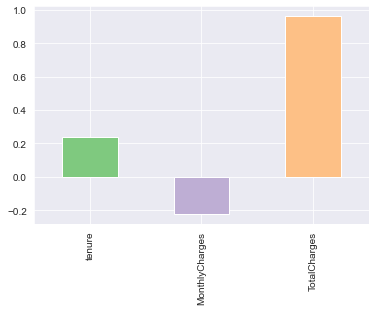

In [55]:
df[cont].skew().plot.bar(color=sns.color_palette('Accent'))

* Analysis with various transformation to remove skewness in dataset.

* The pupose of transformation is to increase the symmetry of the distribution of the features. If a features is asymmetric, applying transformation will make it more symmetric.

* This are tansfommer that are applied to data more normality is desired. Machine learning algorithms work better when distribution is normal. for linear model it is highly crucial step.

 

In [56]:
data=df.copy()

* Power Transformation with yeo-johnson method .

In [57]:
from sklearn.preprocessing import PowerTransformer
transform1=pd.DataFrame()
pwr1=PowerTransformer(method='yeo-johnson')
transform1[cont]=pwr1.fit_transform(data[cont])
transform1[cont].skew()

tenure           -0.242816
MonthlyCharges   -0.259485
TotalCharges     -0.144643
dtype: float64

* Power Transformation with box-cox method .

In [58]:
from sklearn.preprocessing import PowerTransformer
transform2=pd.DataFrame()
pwr2=PowerTransformer(method='box-cox')
transform2[cont]=pwr2.fit_transform(data[cont])
transform2[cont].skew()

tenure           -0.285859
MonthlyCharges   -0.264348
TotalCharges     -0.145758
dtype: float64

* Sqaure root transformation

In [59]:
transform3=pd.DataFrame()
transform3=np.sqrt(data[cont])
transform3.skew()


tenure           -0.234197
MonthlyCharges   -0.486283
TotalCharges      0.308926
dtype: float64

* log transformation

In [60]:
transform4=pd.DataFrame()
transform4=np.log(data[cont])
transform4.skew()

tenure           -0.960180
MonthlyCharges   -0.730938
TotalCharges     -0.753574
dtype: float64

* from above analysis it can be observed that  PowerTransformer with yeo-johnson method works betterr as it remove skewness of features effectively and made the distributions normal.

Lets transform original dataframe with PowerTransformer with yeo-johnson method

In [61]:
pwr=PowerTransformer(method='yeo-johnson')
df[cont]=pwr.fit_transform(df[cont])

* Analyse skewness after transformation.

In [62]:
df[cont].skew()

tenure           -0.242816
MonthlyCharges   -0.259485
TotalCharges     -0.144643
dtype: float64

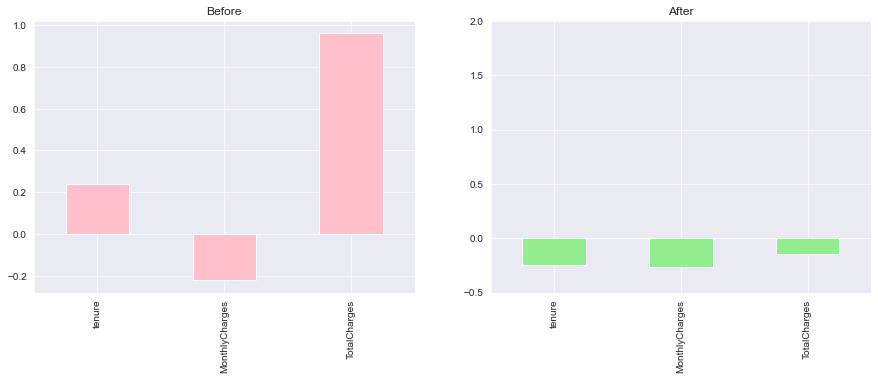

In [63]:
fig,axs=plt.subplots(1,2)

data[cont].skew().plot.bar(ax=axs[0],color='pink',title='Before',figsize=(15,5))
df[cont].skew().plot.bar(ax=axs[1],color='lightgreen',title='After')
plt.yticks(np.arange(-0.5,2.5,0.5))
plt.show()

* Skewness has been removed from features can be observed from distribution graph

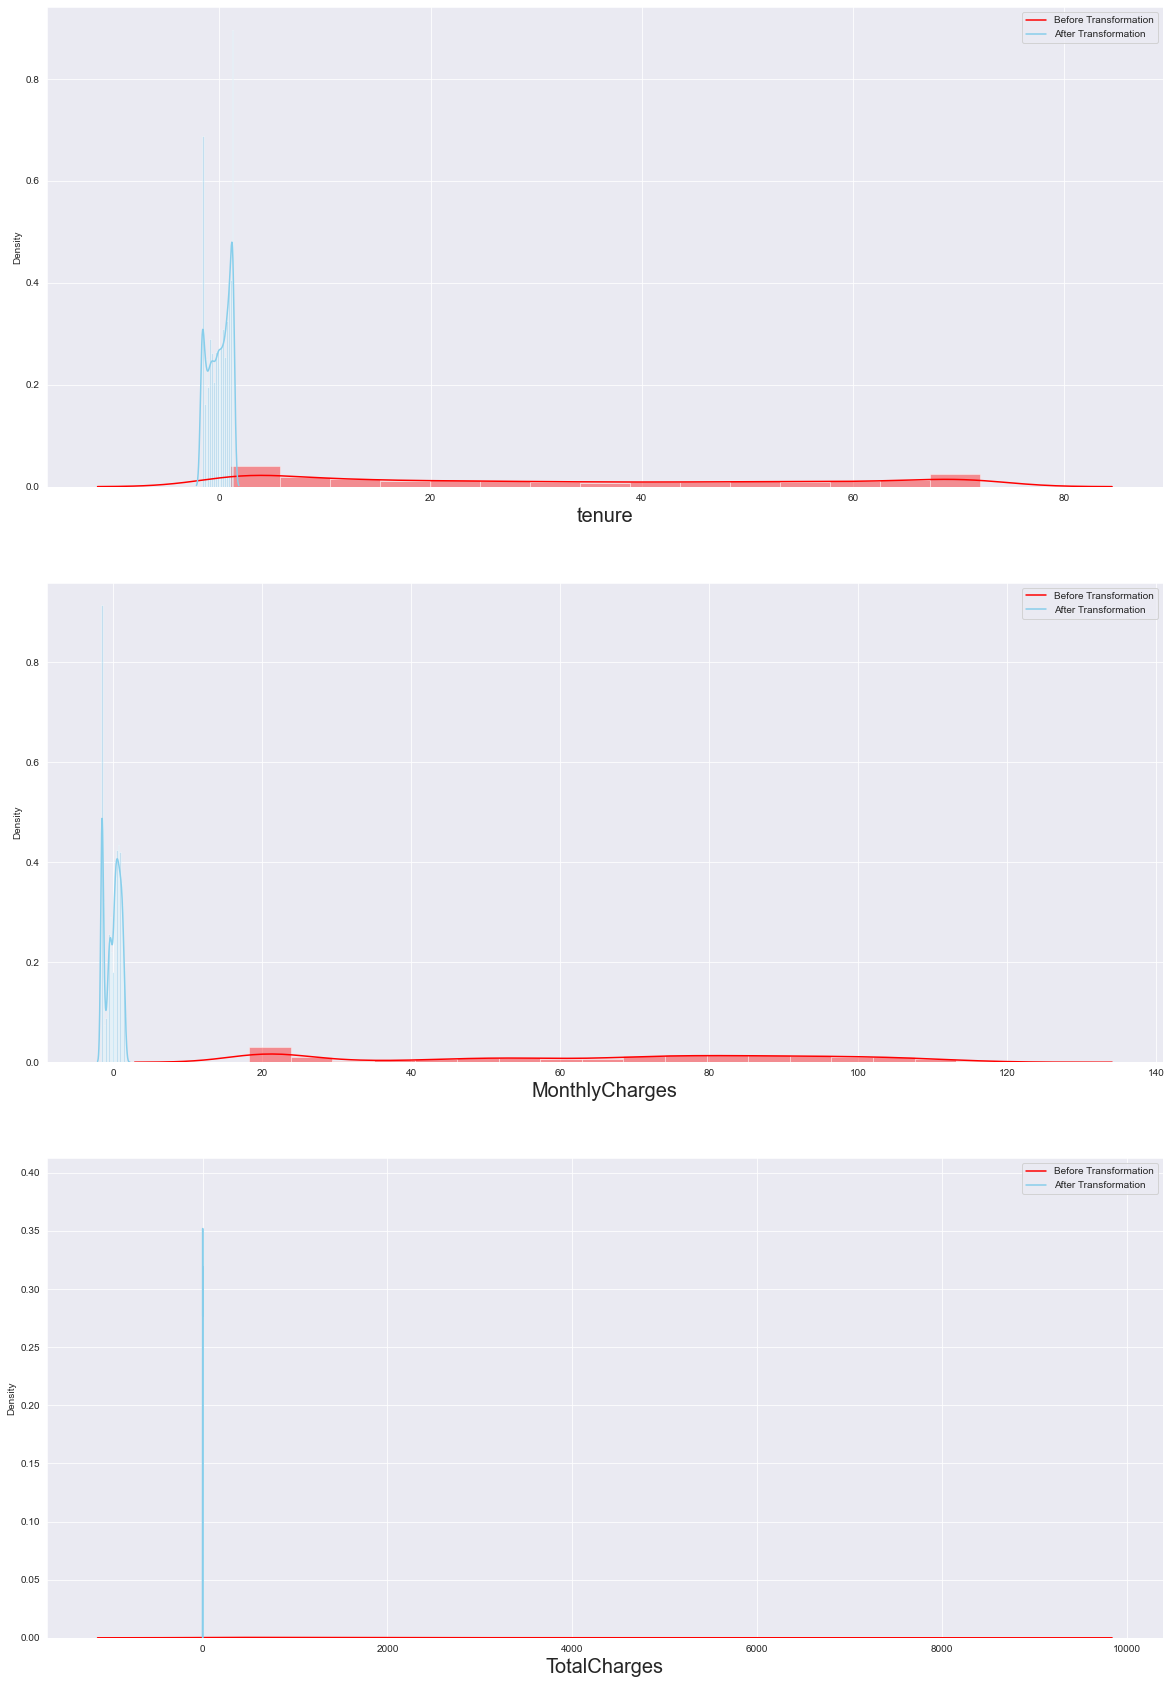

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(3,1,graph)
        sns.distplot(data[column],color='red')
        sns.distplot(df[column],color='skyblue')
        plt.xlabel(column,fontsize=20)
        plt.legend(['Before Transformation','After Transformation'])
        
    graph+=1
plt.show()
plt.tight_layout()

* Analysing Imbalanced In Label

In [65]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Churn'>

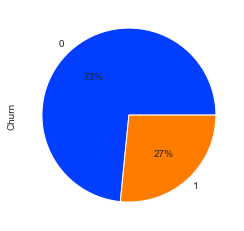

In [66]:
df['Churn'].value_counts().plot.pie(autopct="%0.00f%%")

<AxesSubplot:>

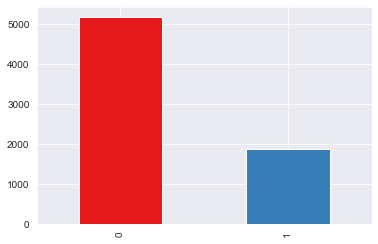

In [67]:
df['Churn'].value_counts().plot.bar(color=sns.color_palette('Set1'))

* There is imbalanced in Label feature as 73-27 proportion of binary class

* Splitting dataset into feature and label

In [68]:
x1=df.drop('Churn',axis=1)
y1=df.Churn

In [69]:
print('x1 shape is ',x1.shape)
print('y1 shape is ',y1.shape)

x1 shape is  (7032, 19)
y1 shape is  (7032,)


* Standadization of features.

  It is required too scale all feature in same scale for better performance. StatndaScaler calculate distance of data values from mean and divide it by standard deviation for each feature independently.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x1)

In [71]:
x_scaled.shape

(7032, 19)

* Principal Component Analysis :

      1] Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in  machine learning. 

      2] It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components

      3] The importance of each component decreases when going to 1 to n, it means the 1 PC has the most importance, and n PC will have the least importance.

* As The Original Features in given dataset have low  correlation with label, To reduce multicollinearity from feature It is required to eleiminate some features having correlation more than other features.It is not possible to eleiminate collinear features which will losse important information in data.

* Hence to handle this scenario of low correlation with label and  to extract Uncorrelated  feature component from original feature , PCA will be effective solution.

In [72]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[-2.85576826,  0.1039383 ,  2.8124851 , ...,  0.75687748,
        -0.33781465,  0.02677742],
       [-0.88902927, -0.99146058,  0.9182653 , ...,  0.05140107,
         0.18642381, -0.02829519],
       [-2.78275141, -0.05387128,  0.92823263, ...,  0.81225893,
         0.28877514,  0.07835637],
       ...,
       [-1.87837586, -0.90990158,  3.50038925, ..., -0.46016123,
        -0.27485705, -0.09150481],
       [-2.34101607,  2.05440621,  0.06438575, ...,  0.69187923,
        -0.30611298, -0.01028642],
       [ 2.98908564,  0.06304636, -0.63556375, ..., -0.18512421,
        -0.76654698, -0.02108089]])

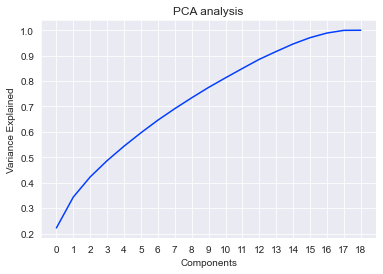

In [73]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance Explained')
plt.title('PCA analysis')
plt.xticks(range(0,19))
plt.show()

In [74]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.222010
1     0.343651
2     0.422910
3     0.486914
4     0.543773
5     0.596495
6     0.646095
7     0.691350
8     0.734090
9     0.775016
10    0.812769
11    0.849648
12    0.885717
13    0.916487
14    0.946097
15    0.970789
16    0.989045
17    0.999538
18    1.000000
dtype: float64

 * The 14 components of PCA explains 91.64 % variance which willbe used for model building, These 14 component feature are not correlated to each other, fisrt component have highest correlation with label while last component have least correlation with label. 

In [75]:
pca1=PCA(n_components=14) 
dim1=pca1.fit_transform(x_scaled)
x_dim1=pd.DataFrame(dim1,columns=[('PC{}').format(i) for i in range(1,15)])
x_dim1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-2.855768,0.103938,2.812485,-0.232685,0.902801,-1.094941,1.289995,1.120853,-2.119858,-0.427184,-0.140459,-0.221423,-0.121059,0.422713
1,-0.889029,-0.991461,0.918265,1.120817,-0.624123,1.128855,-0.790013,0.313495,2.045572,-0.227087,1.282866,-1.092761,-1.109188,-1.327590
2,-2.782751,-0.053871,0.928233,0.474390,-0.678848,0.723082,-1.670962,2.087468,-0.481750,0.539881,0.114075,0.056339,-1.454396,0.145767
3,0.336615,-1.526014,3.443249,2.398263,-0.175759,1.160411,0.553516,-1.589213,0.638408,0.045994,0.231899,-0.680519,-0.053148,0.814253
4,-3.360151,0.839658,-0.122736,-0.211386,-0.471082,-1.113306,-0.750694,-0.424463,-0.248496,0.299976,-0.034723,-0.461044,0.034543,-0.488536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,2.022839,-0.171328,0.135777,-0.343692,2.506984,0.458934,-1.429162,0.696777,1.908225,0.430902,-0.637768,-0.729062,-0.044738,0.981395
7028,3.258706,1.098667,-0.725276,-1.535559,0.864726,-1.086683,0.185083,0.098516,-1.136614,-0.962918,0.834030,-0.546644,-0.290683,-0.261495
7029,-1.878376,-0.909902,3.500389,-1.313747,1.350408,-1.267631,0.696156,0.280635,0.137962,0.179694,-1.163385,-0.504678,-1.540114,0.565345
7030,-2.341016,2.054406,0.064386,-1.704279,-0.417353,1.236642,1.084158,1.099683,1.216270,0.303330,-0.854148,-0.636441,0.745473,0.316628


* Datset with component

In [76]:
x_dim1.shape

(7032, 14)

In [77]:
y1.shape

(7032,)

* Imbalanced in classes in label 

In [78]:
y1.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

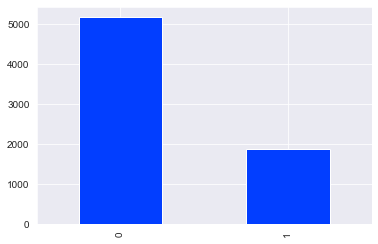

In [79]:
y1.value_counts().plot.bar()

* SMOTE :
     
     1] SMOTE (synthetic minority oversampling technique) is used for oversampling  to solve the imbalance problem.
     
     2] SMOTE synthesises new minority instances between existing minority instances.These synthetic training instances are generated by randomly selecting desired number  of the k_neighbors for each example in the minority class.
     
     3] In our scenario , There is imbalanced in label to overcome this Imbalanced we will apply SMOTE.

* Application of SMOTE to convert imbalanced classes into balanced classes.

In [80]:
from imblearn.over_sampling import SMOTE,ADASYN

sm=SMOTE(sampling_strategy=0.85,k_neighbors=3,random_state=13)
x,y=sm.fit_resample(x_dim1,y1)

* Shape of features and labels after oversampling with SMOTE

In [81]:
print('Resample features shape is ',x.shape)
print('Resample label shape is ',y.shape)

Resample features shape is  (9551, 14)
Resample label shape is  (9551,)


* Analysing Class Imbalanced after SMOTE 

In [82]:
y.value_counts()

0    5163
1    4388
Name: Churn, dtype: int64

<AxesSubplot:>

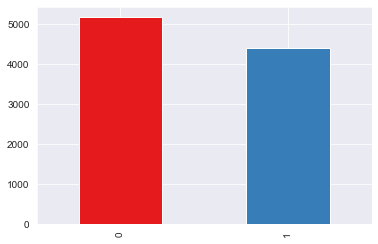

In [83]:
y.value_counts().plot.bar(color=sns.color_palette('Set1'))

<AxesSubplot:ylabel='Churn'>

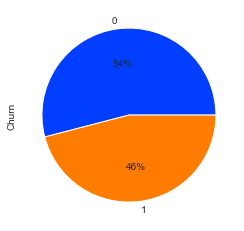

In [84]:
y.value_counts().plot.pie(autopct="%0.00f%%")

* Training algorithms 

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve

In [86]:
from sklearn.model_selection import train_test_split


maxac=0
maxRs=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    clf=LogisticRegression()
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("acuracy score ",acc,'Random sate ',i)
    
    if acc>maxac:
        maxac=acc
        maxRs=i
        print("Accuracy",maxac,"random_state",i)
        
        

acuracy score  0.7582417582417582 Random sate  1
Accuracy 0.7582417582417582 random_state 1
acuracy score  0.7807430664573521 Random sate  2
Accuracy 0.7807430664573521 random_state 2
acuracy score  0.7708006279434851 Random sate  3
acuracy score  0.7728937728937729 Random sate  4
acuracy score  0.7723704866562009 Random sate  5
acuracy score  0.7687074829931972 Random sate  6
acuracy score  0.7791732077446363 Random sate  7
acuracy score  0.7781266352694924 Random sate  8
acuracy score  0.7713239141810571 Random sate  9
acuracy score  0.7598116169544741 Random sate  10
acuracy score  0.760858189429618 Random sate  11
acuracy score  0.7571951857666144 Random sate  12
acuracy score  0.7755102040816326 Random sate  13
acuracy score  0.7734170591313448 Random sate  14
acuracy score  0.7660910518053375 Random sate  15
acuracy score  0.7634746206174777 Random sate  16
acuracy score  0.7681841967556253 Random sate  17
acuracy score  0.7655677655677655 Random sate  18
acuracy score  0.7765567

In [87]:
print("Maximum accuracy Score is {0} and Random state is {1}".format(maxac,maxRs))

Maximum accuracy Score is 0.792778649921507 and Random state is 53


* Train Test Split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=53)

* Score fuction for binary classification

In [89]:
def Cscore(clf,x_trn,y_trn,x_tst,y_tst,train_score=True):
    if train_score:
        ypred_train=clf.predict(x_trn)
        print('******** Train Results***************')
        print("Train Accuracy Score is ",accuracy_score(y_trn,ypred_train))
        print('******************************************************')
        print("Train roc_auc_Score is ",roc_auc_score(y_trn,ypred_train))
        print('-'*50)
        
    elif train_score==False:
        ypred_test=clf.predict(x_tst)
        print('\n******** Test Results***************')
        print("Test Accuracy Score is ", accuracy_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Precision Score is ", precision_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test f1 Score is ", f1_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Recall Score is ", recall_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test roc_auc_Score is ",roc_auc_score(y_tst,ypred_test))
        print('-'*50)
        print('\n Classification Report \n ',classification_report(y_tst,ypred_test,digits=3))
        print('-'*50)
        print('\n Confusion Matrix  \n\n',sns.heatmap(confusion_matrix(y_tst,ypred_test),annot=True,annot_kws={'color':'black'},fmt="d",cmap='Pastel2'))

### Training various algorithms.

* Logistic Regression

******** Train Results***************
Train Accuracy Score is  0.7609947643979058
******************************************************
Train roc_auc_Score is  0.7616749553317459
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.792778649921507
******************************************************
Test Precision Score is  0.7657266811279827
******************************************************
Test f1 Score is  0.7809734513274337
******************************************************
Test Recall Score is  0.7968397291196389
******************************************************
Test roc_auc_Score is  0.7930540109012828
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.818     0.789     0.803      1025
           1      0.766     0.797     0.781       886

    accuracy                          0.793      1911
   macro 

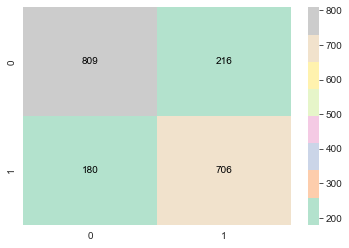

In [90]:
Lr1=LogisticRegression()
Lr1.fit(x_train,y_train)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=False)

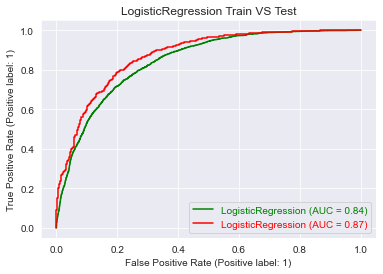

In [91]:
AucPlot1=plot_roc_curve(Lr1,x_train,y_train,color='g')
plot_roc_curve(Lr1,x_test,y_test,ax=AucPlot1.ax_,color='r')
plt.title("LogisticRegression Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Decision Tree Classifier

******** Train Results***************
Train Accuracy Score is  0.7653141361256545
******************************************************
Train roc_auc_Score is  0.7670448758273599
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.7723704866562009
******************************************************
Test Precision Score is  0.7366211962224554
******************************************************
Test f1 Score is  0.763458401305057
******************************************************
Test Recall Score is  0.7923250564334086
******************************************************
Test roc_auc_Score is  0.7737235038264605
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.808     0.755     0.781      1025
           1      0.737     0.792     0.763       886

    accuracy                          0.772      1911
   macro 

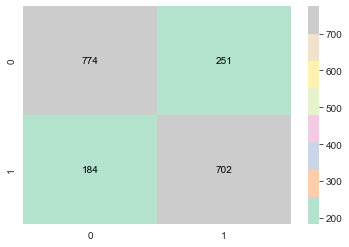

In [92]:
dt1=DecisionTreeClassifier(criterion='entropy',min_samples_split=10,min_samples_leaf=30,max_depth=5,random_state=112)
dt1.fit(x_train,y_train)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=False)

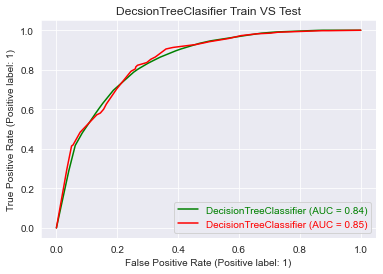

In [93]:
AucPlot2=plot_roc_curve(dt1,x_train,y_train,color='g')
plot_roc_curve(dt1,x_test,y_test,ax=AucPlot2.ax_,color='r')
plt.title("DecsionTreeClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* GradientBoostingClassifier

******** Train Results***************
Train Accuracy Score is  0.9977748691099476
******************************************************
Train roc_auc_Score is  0.997814202144794
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8346415489272632
******************************************************
Test Precision Score is  0.8173719376391982
******************************************************
Test f1 Score is  0.8228699551569507
******************************************************
Test Recall Score is  0.8284424379232506
******************************************************
Test roc_auc_Score is  0.8342212189616252
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.850     0.840     0.845      1025
           1      0.817     0.828     0.823       886

    accuracy                          0.835      1911
   macro 

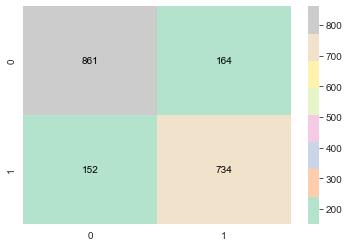

In [94]:
gbdt1=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,criterion='friedman_mse',min_samples_split=30,min_samples_leaf=20,max_depth=65,random_state=112)
gbdt1.fit(x_train,y_train)

Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=False)

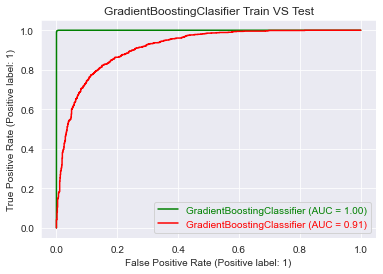

In [95]:
AucPlot3=plot_roc_curve(gbdt1,x_train,y_train,color='green')
plot_roc_curve(gbdt1,x_test,y_test,ax=AucPlot3.ax_,color='red')
plt.title("GradientBoostingClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* RandomForestClassifier

******** Train Results***************
Train Accuracy Score is  0.9509162303664922
******************************************************
Train roc_auc_Score is  0.9513088426443607
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8424908424908425
******************************************************
Test Precision Score is  0.8342857142857143
******************************************************
Test f1 Score is  0.8290743895513912
******************************************************
Test Recall Score is  0.8239277652370203
******************************************************
Test roc_auc_Score is  0.841232175301437
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.849     0.859     0.854      1025
           1      0.834     0.824     0.829       886

    accuracy                          0.842      1911
   macro 

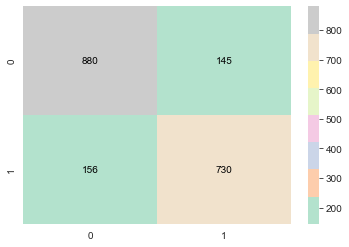

In [96]:
rf1=RandomForestClassifier(criterion='gini',max_depth=18,min_samples_split=13,min_samples_leaf=1,bootstrap=True,oob_score=True,random_state=118)
rf1.fit(x_train,y_train)

Cscore(rf1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf1,x_train,y_train,x_test,y_test,train_score=False)



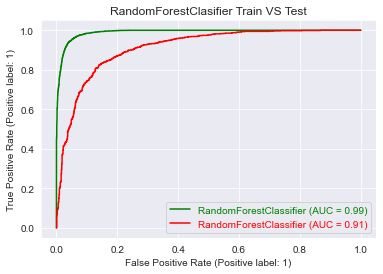

In [97]:
AucPlot4=plot_roc_curve(rf1,x_train,y_train,color='green')
plot_roc_curve(rf1,x_test,y_test,ax=AucPlot4.ax_,color='red')
plt.title("RandomForestClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* XGBClassifier

******** Train Results***************
Train Accuracy Score is  0.9984293193717277
******************************************************
Train roc_auc_Score is  0.9984622472168773
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8367346938775511
******************************************************
Test Precision Score is  0.8253968253968254
******************************************************
Test f1 Score is  0.8235294117647058
******************************************************
Test Recall Score is  0.8216704288939052
******************************************************
Test roc_auc_Score is  0.8357132632274404
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.846     0.850     0.848      1025
           1      0.825     0.822     0.824       886

    accuracy                          0.837      1911
   macro

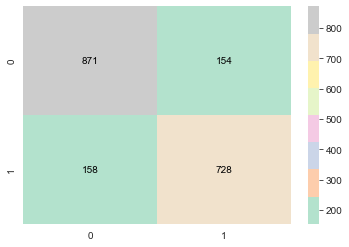

In [98]:
xgc1=XGBClassifier(learning_rate=0.1,booster='gbtree',max_depth=65,random_state=118)
xgc1.fit(x_train,y_train)

Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=False)


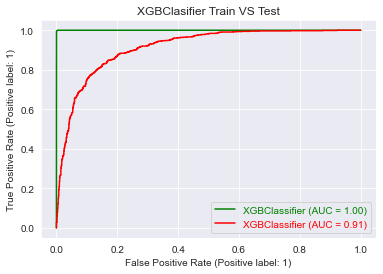

In [99]:
AucPlot5=plot_roc_curve(xgc1,x_train,y_train,color='green')
plot_roc_curve(xgc1,x_test,y_test,ax=AucPlot5.ax_,color='red')
plt.title("XGBClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* AdabosstClassifier

******** Train Results***************
Train Accuracy Score is  0.7214659685863875
******************************************************
Train roc_auc_Score is  0.72779526109364
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.7435897435897436
******************************************************
Test Precision Score is  0.6900191938579654
******************************************************
Test f1 Score is  0.745850622406639
******************************************************
Test Recall Score is  0.8115124153498872
******************************************************
Test roc_auc_Score is  0.7481952320651875
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.808     0.685     0.741      1025
           1      0.690     0.812     0.746       886

    accuracy                          0.744      1911
   macro av

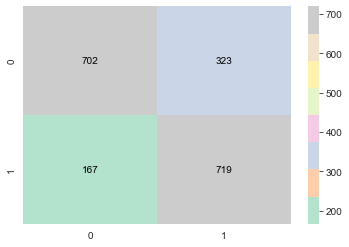

In [100]:
ada1=AdaBoostClassifier(n_estimators=100,learning_rate=0.01,random_state =118)
ada1.fit(x_train,y_train)

Cscore(ada1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(ada1,x_train,y_train,x_test,y_test,train_score=False)


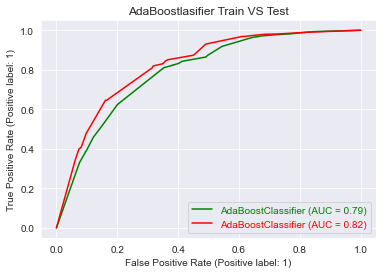

In [101]:
AucPlot6=plot_roc_curve(ada1,x_train,y_train,color='green')
plot_roc_curve(ada1,x_test,y_test,ax=AucPlot6.ax_,color='red')
plt.title("AdaBoostlasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* KNeighborsClassifier

******** Train Results***************
Train Accuracy Score is  0.9984293193717277
******************************************************
Train roc_auc_Score is  0.9983305817927973
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8095238095238095
******************************************************
Test Precision Score is  0.7519305019305019
******************************************************
Test f1 Score is  0.8106139438085327
******************************************************
Test Recall Score is  0.8792325056433409
******************************************************
Test roc_auc_Score is  0.8142503991631339
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.878     0.749     0.808      1025
           1      0.752     0.879     0.811       886

    accuracy                          0.810      1911
   macro

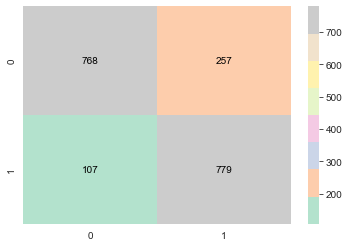

In [102]:
knn1=KNeighborsClassifier(n_neighbors=5,leaf_size=30,algorithm='auto',weights='distance',metric='minkowski')
knn1.fit(x_train,y_train)

Cscore(knn1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn1,x_train,y_train,x_test,y_test,train_score=False)

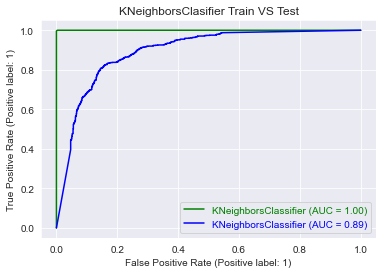

In [103]:
AucPlot7=plot_roc_curve(knn1,x_train,y_train,color='green')
plot_roc_curve(knn1,x_test,y_test,ax=AucPlot7.ax_,color='blue')
plt.title("KNeighborsClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* SVClassifier

******** Train Results***************
Train Accuracy Score is  0.944109947643979
******************************************************
Train roc_auc_Score is  0.9463203240349572
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8451072736787022
******************************************************
Test Precision Score is  0.7961847389558233
******************************************************
Test f1 Score is  0.842720510095643
******************************************************
Test Recall Score is  0.8950338600451467
******************************************************
Test roc_auc_Score is  0.848492539778671
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.898     0.802     0.847      1025
           1      0.796     0.895     0.843       886

    accuracy                          0.845      1911
   macro av

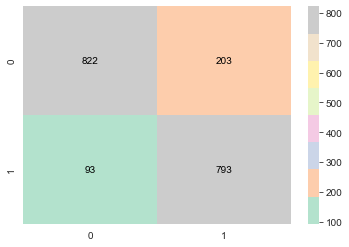

In [104]:
svc1=SVC(kernel='rbf',C=100,gamma=0.1)
svc1.fit(x_train,y_train)

Cscore(svc1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(svc1,x_train,y_train,x_test,y_test,train_score=False)

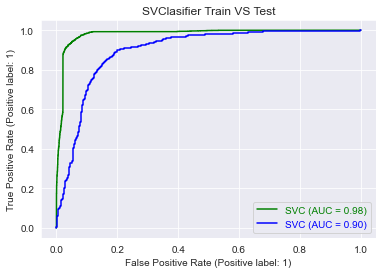

In [105]:
AucPlot8=plot_roc_curve(svc1,x_train,y_train,color='green')
plot_roc_curve(svc1,x_test,y_test,ax=AucPlot8.ax_,color='blue')
plt.title("SVClasifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Finding best cv param for performing and obtaining most generalized cross validation score

In [106]:
from sklearn.model_selection import cross_val_score


for i in [3,5,7,8,9,10]:
    cv=cross_val_score(LogisticRegression(),x,y,cv=i,scoring='accuracy')
    print("Accuracy score is {0} for cv={1}".format(cv.mean(),i))

Accuracy score is 0.7687174286449526 for cv=3
Accuracy score is 0.767250391094819 for cv=5
Accuracy score is 0.7668333970177289 for cv=7
Accuracy score is 0.7663103341518995 for cv=8
Accuracy score is 0.7672512419340111 for cv=9
Accuracy score is 0.7667264343140048 for cv=10


 * There is no effect of cv parameter on accuracy score, Hence It will safe to use any cv parameter within given, lets take cv=5

* Table for analysis of scores

In [107]:
classifiers =[Lr1,gbdt1,dt1,rf1,xgc1,ada1,knn1,svc1]
name=['LogisticRegression','GradientBoostClassifier',
      'DecisionTreeClassifier','RandomForestClassifier','XGBoostClassifier','AdaBoostClassifier','KNeighborsClassifier','SVC']

In [108]:
test_score=[]
test_recall=[]
ra_score=[]
train_score=[]
for i in classifiers:
    ypred_test=i.predict(x_test)
    ypred_train=i.predict(x_train)
    test_score.append(accuracy_score(y_test,ypred_test))
    test_recall.append(recall_score(y_test,ypred_test))
    ra_score.append(roc_auc_score(y_test,ypred_test))
    train_score.append(accuracy_score(y_train,ypred_train))

* Cross Validation with Accuracy  as Scoring metric

In [109]:
cv_scores_mean=[]
for clf in classifiers:
    scr=cross_val_score(clf,x,y,cv=5,scoring="accuracy").mean()   
    cv_scores_mean.append(scr)
cv_scores_mean

[0.767250391094819,
 0.8292364678452936,
 0.7522776101983283,
 0.8201259722576102,
 0.8317481869912685,
 0.7204491494543851,
 0.8041066736803459,
 0.8276655680395395]

* Table for evaluation.

In [110]:
Eval_clf=pd.DataFrame({'Classifier':name,'Train Accuracy Score':train_score,'Test Accuracy Score':test_score,'Test Recall':test_recall,
                      'ROC_AUC_Score':ra_score,'Validation Score':cv_scores_mean})

In [111]:
Eval_clf["criteria of selecting best model"]=Eval_clf['Test Accuracy Score']-Eval_clf['Validation Score']


In [112]:
Eval_clf.sort_values(by="criteria of selecting best model",ascending=True)


,Classifier,Train Accuracy Score,Test Accuracy Score,Test Recall,ROC_AUC_Score,Validation Score,criteria of selecting best model
4,XGBoostClassifier,0.998429,0.836735,0.821670,0.835713,0.831748,0.004987
1,GradientBoostClassifier,0.997775,0.834642,0.828442,0.834221,0.829236,0.005405
6,KNeighborsClassifier,0.998429,0.809524,0.879233,0.814250,0.804107,0.005417
7,SVC,0.944110,0.845107,0.895034,0.848493,0.827666,0.017442
2,DecisionTreeClassifier,0.765314,0.772370,0.792325,0.773724,0.752278,0.020093
3,RandomForestClassifier,0.950916,0.842491,0.823928,0.841232,0.820126,0.022365
5,AdaBoostClassifier,0.721466,0.743590,0.811512,0.748195,0.720449,0.023141
0,LogisticRegression,0.760995,0.792779,0.796840,0.793054,0.767250,0.025528


* The XGBClasifier has performed well with least difference between validation score and Test score . It has no sign of overfitting as the performance in cross validation and test has very minute difference of 0.004

* AUC plot for Train Data

In [113]:
def TrainAUCplot(clf_list,x_train,y_train):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_train,y_train)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_train,y_train,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Train data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

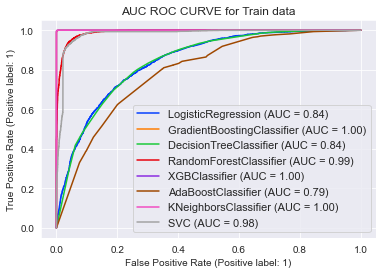

In [114]:
TrainAUCplot(classifiers,x_train,y_train)

'gamma': 0.09, 'learning_rate': 0.1, 'max_depth': 25}
* The auc for XGBClassifier ,randomForestClassifier and GradientBoostingClassifier on train data is 1.0 .

* AUC for Test Data

In [115]:
def TestAUCplot(clf_list,x_test,y_test):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_test,y_test)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_test,y_test,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Test data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

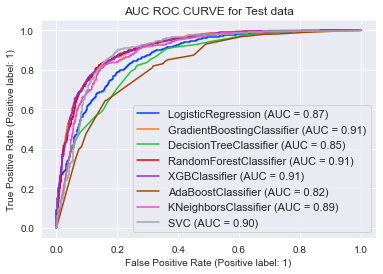

In [116]:

TestAUCplot(classifiers,x_test,y_test)

* The auc for XGBClassifier ,randomForestClassifier and GradientBoostingClassifier on train data is 0.91 .

In [117]:
from sklearn.model_selection import GridSearchCV

* Hyperparameter tunning with XGBoostClassifier

In [118]:
param={'gamma':[0.08,0.09,0.1,0.2,0.5],
                 'learning_rate':[0.08,0.09,0.1,0.3,0.4],
                   'max_depth' :[15,25,45,65,75],
            }


grid=GridSearchCV(XGBClassifier(random_state=118),param_grid=param,cv=5)
grid.fit(x_train,y_train)  
print(grid.best_params_)      


{'gamma': 0.09, 'learning_rate': 0.1, 'max_depth': 25}


******** Train Results***************
Train Accuracy Score is  0.9984293193717277
******************************************************
Train roc_auc_Score is  0.9984622472168773
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.837257980115123
******************************************************
Test Precision Score is  0.8226711560044894
******************************************************
Test f1 Score is  0.8249859313449635
******************************************************
Test Recall Score is  0.827313769751693
******************************************************
Test roc_auc_Score is  0.8365837141441392
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.850     0.846     0.848      1025
           1      0.823     0.827     0.825       886

    accuracy                          0.837      1911
   macro a

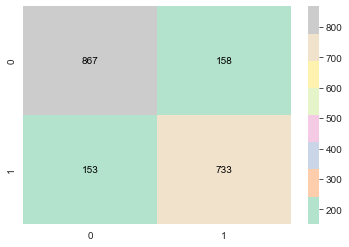

In [119]:
xgc2=grid.best_estimator_
xgc2.fit(x_train,y_train)

Cscore(xgc2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc2,x_train,y_train,x_test,y_test,train_score=False)

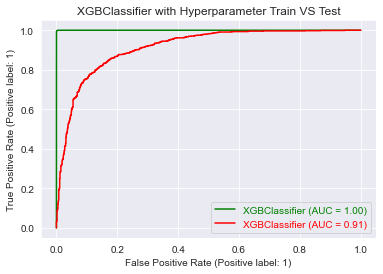

In [120]:
AucPlot9=plot_roc_curve(xgc2,x_train,y_train,color='green')
plot_roc_curve(xgc2,x_test,y_test,ax=AucPlot9.ax_,color='red')
plt.title("XGBClassifier with Hyperparameter Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

# Final model

XGBClasifier with hyperparametr gamma: 0.09,clearning_rate: 0.1, max_depth: 25, random_state=118  is finalized as prediction model 

Evaluation metrics are as follows:

1] Test accuracy is 0.83725  i.e. 83.7 % approx.

2] Train Accuracy is 0.9984

3] roc auc score is 0.8365

4] Auc is grapgh is 0.91 for test and 1.0 for train data.

*  evaluation score

******** Train Results***************
Train Accuracy Score is  0.9984293193717277
******************************************************
Train roc_auc_Score is  0.9984622472168773
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.837257980115123
******************************************************
Test Precision Score is  0.8226711560044894
******************************************************
Test f1 Score is  0.8249859313449635
******************************************************
Test Recall Score is  0.827313769751693
******************************************************
Test roc_auc_Score is  0.8365837141441392
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.850     0.846     0.848      1025
           1      0.823     0.827     0.825       886

    accuracy                          0.837      1911
   macro a

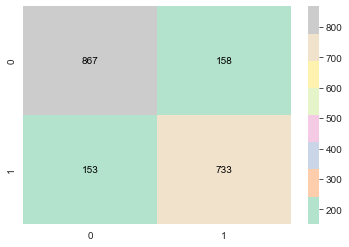

In [121]:
Cscore(xgc2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc2,x_train,y_train,x_test,y_test,train_score=False)


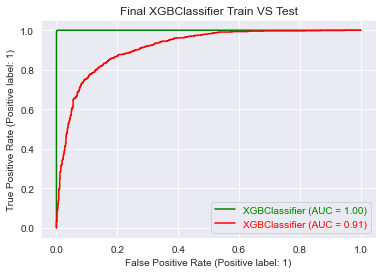

In [122]:
AucPlot9=plot_roc_curve(xgc2,x_train,y_train,color='green')
plot_roc_curve(xgc2,x_test,y_test,ax=AucPlot9.ax_,color='red')
plt.title("Final XGBClassifier Train VS Test")
plt.legend(labelcolor='linecolor')
plt.show()

* Save  model

In [123]:
import joblib
joblib.dump(xgc2,"ChurnPredClf.pkl")

['ChurnPredClf.pkl']